# Final Project NBA SHOTS - GROUP 11

### GROUP 11: 
Hsien Chun Chen (Ken)<br>
Shepherd Chikwawawa<br>
Sthefano Fossa **(Group Lead)**<br>
Rahul Saha<br>
Po An Tao<br>
Anesh Thangaraj<br>

# Ask 1 – Search for a dataset

#### Dataset description

For the project, our group would like to analyze the NBA Shots dataset available on Kaggle. This dataset contains detailed information on NBA player shot attempts, including location, player details, and game context. You can access the dataset in CSV format here (link to the dataset)<br>
<br>
https://github.com/DomSamangy/NBA_Shots_04_24/raw/refs/heads/main/NBA_2023_Shots.csv.zip
https://github.com/DomSamangy/NBA_Shots_04_24/raw/refs/heads/main/NBA_2024_Shots.csv.zip
<br>
<br>
The dataset’s size is approximately 88 MB and was last updated on October 2024 by Dom Samangy. It contains 435K records at the transactional level and 26 variables.<br>
<br>
To prepare the dataset for analysis, we plan to use csvkit to filter unnecessary columns, clean missing data, and create a streamlined version tailored to our research objectives. Initially, the dataset will be uploaded into a Jupyter notebook, where we will inspect its structure and contents. We aim to focus on variables such as shot type, player, shot distance and shot location to extract meaningful insights.<br>
<br>
For more detailed information about the dataset fields and data dictionary, please visit the Kaggle page associated with the dataset.<br>
https://www.kaggle.com/datasets/mexwell/nba-shots

#### Dataset source

The NBA Shots dataset on Kaggle represents detailed data about shot attempts in NBA games, collected across various teams and players in the league. This dataset is a subset of broader statistical collections on NBA performance, which are maintained and documented by official and third-party basketball analytics platforms.<br>
<br>
Data similar to the NBA Shots dataset can also be found on platforms like the NBA's official statistics page (NBA Stats) and other sports analytics repositories. The dataset provides valuable insights into player performance, shot selection, and game contexts, making it a rich resource for analysis in the sports analytics domain.

####  Why is important and what appeals to you about it?

Why this dataset?
There are several reasons why we chose the NBA Shots dataset from Kaggle for our project:<br>
<br>
First, all members of our group are basketball fans and have certain interest in sports analytics, especially in the context of the NBA (The best basketball league in the world). This dataset allows us to explore a key aspect of the game—player shooting performance—through detailed data points like shot location, type, and game context. By analyzing this dataset, we can gain a deeper understanding of factors that contribute to successful shots.<br>
<br>
Second, the dataset provides an opportunity to investigate strategic elements of basketball. For example, we can explore which shot types or locations lead to higher scoring rates, how individual players perform under different game conditions, and how strategies have evolved over time. Insights from this analysis can help highlight trends, player strengths, and team strategies that contribute to competitive success.<br>
<br>
Finally, the way we are going to apporach this project is by the simulation of an NBA Analytics department, specificaly from the Golden State Warriors, this will be developed further on the questions section.<br>
<br>
In summary, this dataset offers a rich foundation for exploring basketball analytics while aligning with our group’s personal interests and professional aspirations.

#### Is this dataset suitable for dimensional modeling and analytical analysis?

It contains clear numerical fields, such as shot made in the game, which are ideal for fact tables. Additionally, the dataset provides a variety of categorical attributes, such as player, shot, team, and game, which can serve as dimension tables.<br>
<br>
Many categorical attributes, such as shot made (a boolean attribute) and shot distance (a numerical attribute), make it easier to analyze a player's performance. Based on these factors, we can draw conclusions on how to run a more successful NBA team.

#### Acquire data and perform initial exploration to make sure it is suitable for dimensional modeling and analytical analysis

In [29]:
!wget https://github.com/DomSamangy/NBA_Shots_04_24/raw/refs/heads/main/NBA_2023_Shots.csv.zip
!wget https://github.com/DomSamangy/NBA_Shots_04_24/raw/refs/heads/main/NBA_2024_Shots.csv.zip

--2024-12-15 20:23:53--  https://github.com/DomSamangy/NBA_Shots_04_24/raw/refs/heads/main/NBA_2023_Shots.csv.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DomSamangy/NBA_Shots_04_24/refs/heads/main/NBA_2023_Shots.csv.zip [following]
--2024-12-15 20:23:53--  https://raw.githubusercontent.com/DomSamangy/NBA_Shots_04_24/refs/heads/main/NBA_2023_Shots.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3226231 (3.1M) [application/zip]
Saving to: ‘NBA_2023_Shots.csv.zip.1’

NBA_2023_Shots.csv. 100%[===================>]   3.08M  --.-KB/s    in 0.04s   

2024-12-15 20:23:53 (75.6 MB/s) - ‘N

In [30]:
!unzip -o NBA_2023_Shots.csv.zip
!unzip -o NBA_2024_Shots.csv.zip

!rm NBA_2023_Shots.csv.zip
!rm NBA_2024_Shots.csv.zip

Archive:  NBA_2023_Shots.csv.zip
  inflating: NBA_2023_Shots.csv      
  inflating: __MACOSX/._NBA_2023_Shots.csv  
Archive:  NBA_2024_Shots.csv.zip
  inflating: NBA_2024_Shots.csv      
  inflating: __MACOSX/._NBA_2024_Shots.csv  


In [31]:
!csvstack NBA_2023_Shots.csv NBA_2024_Shots.csv > combined_nba_shots.csv

In [32]:
!wc -l combined_nba_shots.csv

435922 combined_nba_shots.csv


In [33]:
!csvcut -n combined_nba_shots.csv

  1: SEASON_1
  2: SEASON_2
  3: TEAM_ID
  4: TEAM_NAME
  5: PLAYER_ID
  6: PLAYER_NAME
  7: POSITION_GROUP
  8: POSITION
  9: GAME_DATE
 10: GAME_ID
 11: HOME_TEAM
 12: AWAY_TEAM
 13: EVENT_TYPE
 14: SHOT_MADE
 15: ACTION_TYPE
 16: SHOT_TYPE
 17: BASIC_ZONE
 18: ZONE_NAME
 19: ZONE_ABB
 20: ZONE_RANGE
 21: LOC_X
 22: LOC_Y
 23: SHOT_DISTANCE
 24: QUARTER
 25: MINS_LEFT
 26: SECS_LEFT


In [34]:
!head -n 43600 combined_nba_shots.csv | csvstat

/home/ubuntu/.local/lib/python3.8/site-packages/agate/table/from_csv.py:74: RuntimeWarning: Error sniffing CSV dialect: Could not determine delimiter
  1. "SEASON_1"

	Type of data:          Number
	Contains null values:  False
	Unique values:         1
	Smallest value:        2023
	Largest value:         2023
	Sum:                   88200777
	Mean:                  2023
	Median:                2023
	StDev:                 0
	Most common values:    2023 (43599x)

  2. "SEASON_2"

	Type of data:          Text
	Contains null values:  False
	Unique values:         1
	Longest value:         7 characters
	Most common values:    2022-23 (43599x)

  3. "TEAM_ID"

	Type of data:          Number
	Contains null values:  False
	Unique values:         6
	Smallest value:        1610612757
	Largest value:         1610612764
	Sum:                   70221105731531
	Mean:                  1610612760.19
	Median:                1610612761
	StDev:                 2.381
	Most common values:    1610612759 (

#### Describe the analytical questions you want to answer with the data.  3+ major questions are required

We propose to simulate a data-driven analytics team within the Golden State Warriors organization. By utilizing the NBA Shots dataset, we aim to provide actionable insights that can optimize player performance, game strategy, and overall team success <br>
The CEO has asked us to make a presentation about the main insights we can observe with the data nba shots, usually our analysis is based on the following questions:

##### Business Question 1(Performance): 
##### Which 5 players do we want to maintain for the next season? (Give the CEO the final list of players with an analysis behind)
1. Accuracy of shots (Shot Made / Total Shots %) Monthly
2. Clutch performance (LAST 3 MINUTES)
3. Performance under place (HOME/AWAY)


The CEO will use the analysis to determine which players are performing well and are worth keeping on the team.<br>
By looking at these factors, the CEO can make informed decisions about which players to keep and which players to let go.

##### Business Question 2(Performance): 
##### In which parts of the field, we are having problems? (Compare it to other teams)


This question asks about the team's shooting performance in different zones on the court. The goal is to identify areas where the team is struggling compared to other teams.<br>
<br>
Chart of accuracy between zones: This chart will show the team's shooting percentage in different zones on the court.<br>
Chart of teams with good accuracy in critical zones: This chart will compare the team's shooting percentage in critical zones to other top-performing teams.<br>
<br>
By analyzing these charts, the CEO can identify areas where the team needs to improve their shooting, such as adjusting their shot selection or practicing specific shots. This information can be used to develop targeted practice plans and refine the team's offensive strategy.

##### Business Question 3(Recruiting):
##### Identify the bottom 5 players, and give suggestion of replacement from other teams (Based on shooting percentage and clutch time performance)

The goal is to address specific team weaknesses and improve overall performance. <br>
<br>
The analysis will likely involve:<br>
<br>
Identifying performance metrics: Shooting percentage.<br>
Comparing player performance: The team's players will be compared to each other and to league averages to identify underperforming players.<br>
Identifying team weaknesses: The team's overall weaknesses will be determined.<br>
<br>
Finding potential replacements: Players from other teams will be identified who could address the team's weaknesses and improve their overall performance.<br>
By following these steps, the CEO can make informed decisions about potential player trades or free agent signings to strengthen the team and improve their chances of success.

#### Describe any concerns with the data and changes you expect to overcome

First, this dataset is quite large, containing thousands of rows and numerous attributes, which can lead to slower processing times during analysis, especially when running complex queries or models.<br>
<br>
Second, in the next stage, we identified that our datasets contain NA values. Therefore, before creating the table, we need to handle these null values appropriately. Additionally, the datasets may include duplicate entries, where a single player is recorded as taking multiple shots within the same specific time frame, which is not logical. To address this issue, we need to remove the duplicate records.

# Ask 2: Data Wrangling and Dimensional Modeling

## 2.1 Get the data from github

In [35]:
!wget https://github.com/DomSamangy/NBA_Shots_04_24/raw/refs/heads/main/NBA_2023_Shots.csv.zip
!wget https://github.com/DomSamangy/NBA_Shots_04_24/raw/refs/heads/main/NBA_2024_Shots.csv.zip

--2024-12-15 20:24:25--  https://github.com/DomSamangy/NBA_Shots_04_24/raw/refs/heads/main/NBA_2023_Shots.csv.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DomSamangy/NBA_Shots_04_24/refs/heads/main/NBA_2023_Shots.csv.zip [following]
--2024-12-15 20:24:25--  https://raw.githubusercontent.com/DomSamangy/NBA_Shots_04_24/refs/heads/main/NBA_2023_Shots.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3226231 (3.1M) [application/zip]
Saving to: ‘NBA_2023_Shots.csv.zip’

NBA_2023_Shots.csv. 100%[===================>]   3.08M  --.-KB/s    in 0.03s   

2024-12-15 20:24:25 (102 MB/s) - ‘NBA_

## 2.2 Unzip the data and remove original zip file

In [36]:
!unzip -o NBA_2023_Shots.csv.zip
!unzip -o NBA_2024_Shots.csv.zip

!rm NBA_2023_Shots.csv.zip
!rm NBA_2024_Shots.csv.zip

Archive:  NBA_2023_Shots.csv.zip
  inflating: NBA_2023_Shots.csv      
  inflating: __MACOSX/._NBA_2023_Shots.csv  
Archive:  NBA_2024_Shots.csv.zip
  inflating: NBA_2024_Shots.csv      
  inflating: __MACOSX/._NBA_2024_Shots.csv  


## 2.3 Merging 2 year NBA shots data 2023-2024

In [37]:
!csvstack NBA_2023_Shots.csv NBA_2024_Shots.csv > combined_nba_shots.csv

In [38]:
!wc -l combined_nba_shots.csv

435922 combined_nba_shots.csv


## 2.4 Show all column names of file combined_nba_shots.csv

In [39]:
!csvcut -n combined_nba_shots.csv

  1: SEASON_1
  2: SEASON_2
  3: TEAM_ID
  4: TEAM_NAME
  5: PLAYER_ID
  6: PLAYER_NAME
  7: POSITION_GROUP
  8: POSITION
  9: GAME_DATE
 10: GAME_ID
 11: HOME_TEAM
 12: AWAY_TEAM
 13: EVENT_TYPE
 14: SHOT_MADE
 15: ACTION_TYPE
 16: SHOT_TYPE
 17: BASIC_ZONE
 18: ZONE_NAME
 19: ZONE_ABB
 20: ZONE_RANGE
 21: LOC_X
 22: LOC_Y
 23: SHOT_DISTANCE
 24: QUARTER
 25: MINS_LEFT
 26: SECS_LEFT


## 2.5 Confirm the data type of each field and whether there are any missing values.

In [40]:
!head -n 43600 combined_nba_shots.csv | csvstat

/home/ubuntu/.local/lib/python3.8/site-packages/agate/table/from_csv.py:74: RuntimeWarning: Error sniffing CSV dialect: Could not determine delimiter
  1. "SEASON_1"

	Type of data:          Number
	Contains null values:  False
	Unique values:         1
	Smallest value:        2023
	Largest value:         2023
	Sum:                   88200777
	Mean:                  2023
	Median:                2023
	StDev:                 0
	Most common values:    2023 (43599x)

  2. "SEASON_2"

	Type of data:          Text
	Contains null values:  False
	Unique values:         1
	Longest value:         7 characters
	Most common values:    2022-23 (43599x)

  3. "TEAM_ID"

	Type of data:          Number
	Contains null values:  False
	Unique values:         6
	Smallest value:        1610612757
	Largest value:         1610612764
	Sum:                   70221105731531
	Mean:                  1610612760.19
	Median:                1610612761
	StDev:                 2.381
	Most common values:    1610612759 (

## 2.6 Create unique id that can use in dimensional modeling and clean the NA values

### 2.6.1 Create new column call SHOT_ID as a simple sequential number (where row 1 equals 1, row 2 equals 2, etc.).

In [41]:
!seq 1 $(($(wc -l < combined_nba_shots.csv) - 1)) > shot_id_column.csv
!echo "SHOT_ID" | cat - shot_id_column.csv > shot_id_with_header.csv

### 2.6.2 Create new column call TIME_ID by combining QUARTER, MINS_LEFT, SECS_LEFT, GAME_ID. For example: GAME_ID=22200004, QUARTER=1, MINS_LEFT=5, SECS_LEFT=10 → time_id=22200004_1_5_10

In [42]:
!csvcut -c GAME_ID,QUARTER,MINS_LEFT,SECS_LEFT combined_nba_shots.csv | \
awk -F',' '{if (NR==1) print "TIME_ID"; else print $1 "_" $2 "_" $3 "_" $4}' > time_id_column.csv

### 2.6.3 Combine shot_id, time_id, and the original dataset into one file

In [43]:
!paste -d ',' shot_id_with_header.csv time_id_column.csv combined_nba_shots.csv > final_combined_nba_shots.csv

In [44]:
!wc -l shot_id_with_header.csv
!wc -l time_id_column.csv
!wc -l combined_nba_shots.csv
!wc -l final_combined_nba_shots.csv

435922 shot_id_with_header.csv
435922 time_id_column.csv
435922 combined_nba_shots.csv
435922 final_combined_nba_shots.csv


### 2.6.4 Remove NA values in the column POSITION_GROUP == 'NA'

In [45]:
!csvgrep -c POSITION_GROUP -i -m "NA" final_combined_nba_shots.csv > cleaned_final_combined_nba_shots.csv

In [46]:
!wc -l cleaned_final_combined_nba_shots.csv

433227 cleaned_final_combined_nba_shots.csv


### 2.6.5 Check if there is any errors or NA in our final datasets.

In [47]:
!csvclean cleaned_final_combined_nba_shots.csv

No errors.


## 2.7 Check the PostgreSQL

### 2.7.1 Check if the ipython-sql or psycopg2 packages are installed in the current environment.

In [48]:
!pip freeze | grep -E 'ipython-sql|psycopg2'

ipython-sql==0.4.1
psycopg2==2.9.5
psycopg2-binary==2.9.5


## 2.7.2 Check the version of the PostgreSQL command-line client (psql) installed on my system.

In [49]:
!psql --version

psql (PostgreSQL) 12.22 (Ubuntu 12.22-0ubuntu0.20.04.1)


## 2.8 Database

### 2.8.1 To ensure the database is in a clean state and to avoid potential issues caused by an existing database, first drop the database and then create a new one.

In [50]:
!dropdb -U student Final_project

dropdb: error: database removal failed: ERROR:  database "Final_project" is being accessed by other users
DETAIL:  There is 1 other session using the database.


In [51]:
!createdb -U student Final_project

createdb: error: database creation failed: ERROR:  database "Final_project" already exists


###  2.8.2 Load the ipython-sql extension

In [52]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


### 2.8.3 Connect to the PostgreSQL database named Final_project

In [53]:
%sql postgresql://student@/Final_project

### 2.8.4 Create table and import

In [54]:
%%sql
DROP TABLE IF EXISTS MAIN_NBA_SHOTS;

CREATE TABLE MAIN_NBA_SHOTS (                        
    SHOT_ID INT,
    TIME_ID VARCHAR(50) NOT NULL,       
    SEASON_1 INT NOT NULL,              
    SEASON_2 VARCHAR(10) NOT NULL,      
    TEAM_ID INT NOT NULL,               
    TEAM_NAME VARCHAR(100) NOT NULL,    
    PLAYER_ID INT NOT NULL,            
    PLAYER_NAME VARCHAR(100) NOT NULL,  
    POSITION_GROUP CHAR(1) NOT NULL,             
    POSITION VARCHAR(50) NOT NULL,               
    GAME_DATE DATE NOT NULL,            
    GAME_ID INT NOT NULL,               
    HOME_TEAM VARCHAR(100) NOT NULL,    
    AWAY_TEAM VARCHAR(100) NOT NULL,   
    EVENT_TYPE VARCHAR(50) NOT NULL,    
    SHOT_MADE BOOLEAN NOT NULL,         
    ACTION_TYPE VARCHAR(100),           
    SHOT_TYPE VARCHAR(20),              
    BASIC_ZONE VARCHAR(50),             
    ZONE_NAME VARCHAR(50),              
    ZONE_ABB CHAR(2),                   
    ZONE_RANGE VARCHAR(50),             
    LOC_X FLOAT NOT NULL,                        
    LOC_Y FLOAT NOT NULL,                        
    SHOT_DISTANCE FLOAT NOT NULL,                
    QUARTER INT NOT NULL,               
    MINS_LEFT INT NOT NULL,             
    SECS_LEFT INT NOT NULL             
);

 * postgresql://student@/Final_project
Done.
Done.


[]

In [55]:
%%sql
select * from MAIN_NBA_SHOTS

 * postgresql://student@/Final_project
0 rows affected.


shot_id,time_id,season_1,season_2,team_id,team_name,player_id,player_name,position_group,position,game_date,game_id,home_team,away_team,event_type,shot_made,action_type,shot_type,basic_zone,zone_name,zone_abb,zone_range,loc_x,loc_y,shot_distance,quarter,mins_left,secs_left


### 2.8.5 Load the data directly using COPY command. 

In [56]:
!pwd

/home/ubuntu/notebooks


In [62]:
%%sql
COPY MAIN_NBA_SHOTS FROM '/home/ubuntu/notebooks/cleaned_final_combined_nba_shots.csv'
CSV
HEADER;

 * postgresql://student@/Final_project
433226 rows affected.


[]

### 2.8.6  Ensure that the fact table contains the right number of records

In [63]:
%%sql
SELECT COUNT(*) FROM MAIN_NBA_SHOTS;

 * postgresql://student@/Final_project
1 rows affected.


count
866452


In [64]:
%%sql
SELECT * FROM MAIN_NBA_SHOTS
LIMIT 10

 * postgresql://student@/Final_project
10 rows affected.


shot_id,time_id,season_1,season_2,team_id,team_name,player_id,player_name,position_group,position,game_date,game_id,home_team,away_team,event_type,shot_made,action_type,shot_type,basic_zone,zone_name,zone_abb,zone_range,loc_x,loc_y,shot_distance,quarter,mins_left,secs_left
1,22200004_1_11_20,2023,2022-23,1610612764,Washington Wizards,203078,Bradley Beal,G,SG,2022-10-19,22200004,IND,WAS,Made Shot,True,Jump Shot,3PT Field Goal,Left Corner 3,Left Side,L,24+ ft.,23.4,12.95,24.0,1,11,20
2,22200004_1_10_52,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,2022-10-19,22200004,IND,WAS,Missed Shot,False,Step Back Jump shot,3PT Field Goal,Above the Break 3,Center,C,24+ ft.,-0.4,31.45,26.0,1,10,52
3,22200004_1_10_39,2023,2022-23,1610612764,Washington Wizards,1628420,Monte Morris,G,PG,2022-10-19,22200004,IND,WAS,Made Shot,True,Running Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-1.3,5.25,1.0,1,10,39
4,22200004_1_10_31,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,2022-10-19,22200004,IND,WAS,Made Shot,True,Cutting Dunk Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-0.1,7.25,2.0,1,10,31
5,22200004_1_10_5,2023,2022-23,1610612764,Washington Wizards,1630166,Deni Avdija,F,SF,2022-10-19,22200004,IND,WAS,Made Shot,True,Cutting Dunk Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,1.8,7.15,2.0,1,10,5
6,22200004_1_9_25,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,2022-10-19,22200004,IND,WAS,Missed Shot,False,Jump Shot,3PT Field Goal,Above the Break 3,Center,C,24+ ft.,2.0,31.65,26.0,1,9,25
7,22200004_1_8_25,2023,2022-23,1610612764,Washington Wizards,1628420,Monte Morris,G,PG,2022-10-19,22200004,IND,WAS,Missed Shot,False,Running Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-2.2,6.95,2.0,1,8,25
8,22200004_1_7_58,2023,2022-23,1610612764,Washington Wizards,1628398,Kyle Kuzma,F,PF,2022-10-19,22200004,IND,WAS,Made Shot,True,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center,LC,24+ ft.,19.7,20.55,24.0,1,7,58
9,22200004_1_7_29,2023,2022-23,1610612764,Washington Wizards,1628398,Kyle Kuzma,F,PF,2022-10-19,22200004,IND,WAS,Made Shot,True,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center,RC,24+ ft.,-8.3,29.85,25.0,1,7,29
10,22200004_1_6_46,2023,2022-23,1610612764,Washington Wizards,1628398,Kyle Kuzma,F,PF,2022-10-19,22200004,IND,WAS,Made Shot,True,Driving Layup Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-2.3,7.35,3.0,1,6,46


## 2.9 Dimentional modeling 

### 2.9.1 Model data using dimensional modeling

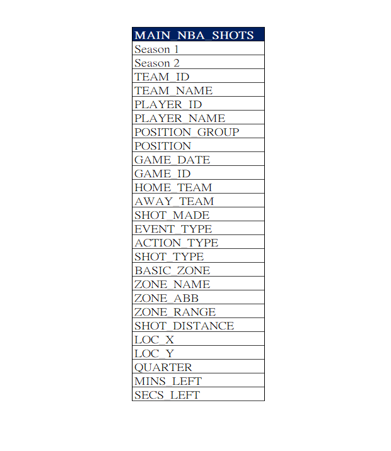

### 2.9.2 Dimension Table

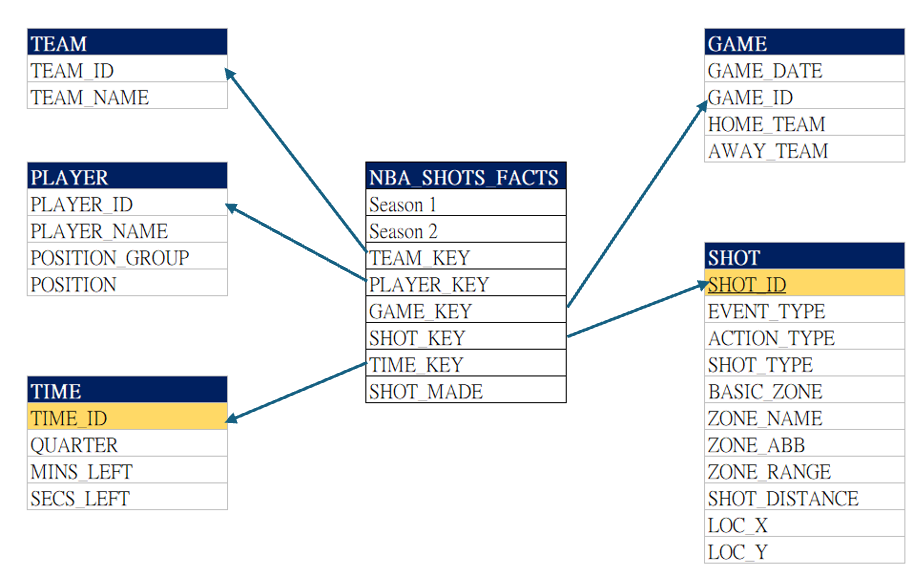

### 2.9.3 Create all dimension table

#### A. Team dimension

##### Create table

In [65]:
%%sql
DROP TABLE IF EXISTS TEAM;

CREATE TABLE TEAM (
    KEY SERIAL PRIMARY KEY,
    TEAM_ID INT NOT NULL,
    TEAM_NAME VARCHAR(50) NOT NULL
);

 * postgresql://student@/Final_project
Done.
Done.


[]

##### Insert value from fact table

In [66]:
%%sql
INSERT INTO TEAM (TEAM_ID, TEAM_NAME)
SELECT distinct TEAM_ID, TEAM_NAME
FROM MAIN_NBA_SHOTS;

 * postgresql://student@/Final_project
30 rows affected.


[]

In [67]:
%%sql
SELECT * FROM TEAM
LIMIT 30

 * postgresql://student@/Final_project
30 rows affected.


key,team_id,team_name
1,1610612756,Phoenix Suns
2,1610612757,Portland Trail Blazers
3,1610612762,Utah Jazz
4,1610612746,LA Clippers
5,1610612755,Philadelphia 76ers
6,1610612740,New Orleans Pelicans
7,1610612745,Houston Rockets
8,1610612744,Golden State Warriors
9,1610612758,Sacramento Kings
10,1610612754,Indiana Pacers


##### Add TEAM_KEY to fact_table

In [68]:
%%sql
ALTER TABLE MAIN_NBA_SHOTS
ADD COLUMN TEAM_KEY INTEGER,
ADD CONSTRAINT fk_team_KEY
 FOREIGN KEY (TEAM_KEY)
 REFERENCES TEAM (KEY);

 * postgresql://student@/Final_project
Done.


[]

In [69]:
%%sql
SELECT * FROM TEAM
LIMIT 10

 * postgresql://student@/Final_project
10 rows affected.


key,team_id,team_name
1,1610612756,Phoenix Suns
2,1610612757,Portland Trail Blazers
3,1610612762,Utah Jazz
4,1610612746,LA Clippers
5,1610612755,Philadelphia 76ers
6,1610612740,New Orleans Pelicans
7,1610612745,Houston Rockets
8,1610612744,Golden State Warriors
9,1610612758,Sacramento Kings
10,1610612754,Indiana Pacers


##### Link TEAM_key by the unique variable "team_id"

In [70]:
%%sql
UPDATE MAIN_NBA_SHOTS AS m
SET TEAM_KEY = t.key
FROM TEAM AS t
WHERE m.team_id = t.team_id
And m.team_name = t.team_name;

 * postgresql://student@/Final_project
866452 rows affected.


[]

##### Remove "team_id" from Main_NBA_shots

In [71]:
%%sql
Alter Table MAIN_NBA_SHOTS
Drop Column TEAM_NAME,
Drop column Team_id;

 * postgresql://student@/Final_project
Done.


[]

In [72]:
%%sql
SELECT * FROM MAIN_NBA_SHOTS
LIMIT 10

 * postgresql://student@/Final_project
10 rows affected.


shot_id,time_id,season_1,season_2,player_id,player_name,position_group,position,game_date,game_id,home_team,away_team,event_type,shot_made,action_type,shot_type,basic_zone,zone_name,zone_abb,zone_range,loc_x,loc_y,shot_distance,quarter,mins_left,secs_left,team_key
5810,22201016_1_1_30,2023,2022-23,201959,Taj Gibson,C,C,2023-03-12,22201016,PHI,WAS,Made Shot,True,Jump Shot,2PT Field Goal,Mid-Range,Center,C,16-24 ft.,1.5,21.65,16.0,1,1,30,19
5826,22201016_2_5_40,2023,2022-23,1630166,Deni Avdija,F,SF,2023-03-12,22201016,PHI,WAS,Missed Shot,False,Pullup Jump shot,2PT Field Goal,Mid-Range,Right Side,R,8-16 ft.,-8.5,17.45,14.0,2,5,40,19
5950,22201028_4_6_21,2023,2022-23,1630557,Corey Kispert,F,SF,2023-03-14,22201028,WAS,DET,Missed Shot,False,Jump Shot,3PT Field Goal,Right Corner 3,Right Side,R,24+ ft.,-22.5,5.35,22.0,4,6,21,19
6313,22201098_1_4_23,2023,2022-23,1630166,Deni Avdija,F,SF,2023-03-24,22201098,WAS,SAS,Made Shot,True,Jump Shot,3PT Field Goal,Left Corner 3,Left Side,L,24+ ft.,22.5,13.55,23.0,1,4,23,19
7709,22200087_1_1_53,2023,2022-23,1629659,Talen Horton-Tucker,G,SG,2022-10-29,22200087,UTA,MEM,Missed Shot,False,Jump Shot,3PT Field Goal,Above the Break 3,Center,C,24+ ft.,-6.5,30.25,25.0,1,1,53,3
7810,22200101_2_6_54,2023,2022-23,1627736,Malik Beasley,G,SG,2022-10-31,22200101,UTA,MEM,Made Shot,True,Layup Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,2.0,6.25,2.0,2,6,54,3
7941,22200115_4_6_34,2023,2022-23,201144,Mike Conley,G,PG,2022-11-02,22200115,DAL,UTA,Made Shot,True,Jump Shot,2PT Field Goal,Mid-Range,Right Side,R,16-24 ft.,-20.7,4.15,20.0,4,6,34,3
8126,22200143_4_4_13,2023,2022-23,1627736,Malik Beasley,G,SG,2022-11-06,22200143,LAC,UTA,Made Shot,True,Jump Shot,3PT Field Goal,Left Corner 3,Left Side,L,24+ ft.,23.0,8.95,23.0,4,4,13,3
8232,22200162_1_8_14,2023,2022-23,1629020,Jarred Vanderbilt,F,PF,2022-11-09,22200162,ATL,UTA,Missed Shot,False,Jump Shot,3PT Field Goal,Right Corner 3,Right Side,R,24+ ft.,-22.9,6.25,22.0,1,8,14,3
8287,22200162_3_2_56,2023,2022-23,200752,Rudy Gay,F,PF,2022-11-09,22200162,ATL,UTA,Missed Shot,False,Jump Shot,3PT Field Goal,Right Corner 3,Right Side,R,24+ ft.,-23.7,9.45,24.0,3,2,56,3


#### B. Player  dimension

##### The same process as creating team table

In [73]:
%%sql
DROP TABLE IF EXISTS PLAYER;

CREATE TABLE PLAYER (
    KEY SERIAL PRIMARY KEY,
    PLAYER_ID INT NOT NULL,            
    PLAYER_NAME VARCHAR(100) NOT NULL,  
    POSITION_GROUP CHAR(1) NOT NULL,             
    POSITION VARCHAR(50) NOT NULL
);

 * postgresql://student@/Final_project
Done.
Done.


[]

In [74]:
%%sql
INSERT INTO PLAYER (PLAYER_ID, PLAYER_NAME, POSITION_GROUP, POSITION)
SELECT DISTINCT PLAYER_ID, PLAYER_NAME, POSITION_GROUP, POSITION
FROM MAIN_NBA_SHOTS;

 * postgresql://student@/Final_project
715 rows affected.


[]

In [75]:
%%sql
SELECT * FROM PLAYER
LIMIT 10

 * postgresql://student@/Final_project
10 rows affected.


key,player_id,player_name,position_group,position
1,2544,LeBron James,F,PF
2,2617,Udonis Haslem,C,C
3,2738,Andre Iguodala,F,SF
4,101108,Chris Paul,G,PG
5,200752,Rudy Gay,F,PF
6,200768,Kyle Lowry,G,PG
7,200782,P.J. Tucker,F,PF
8,201142,Kevin Durant,F,PF
9,201142,Kevin Durant,F,PF-SF
10,201143,Al Horford,C,C


In [76]:
%%sql
ALTER TABLE MAIN_NBA_SHOTS
ADD COLUMN PLAYER_KEY INTEGER,
ADD CONSTRAINT fk_PLAYER
 FOREIGN KEY (PLAYER_KEY)
 REFERENCES PLAYER (KEY);

 * postgresql://student@/Final_project
Done.


[]

In [77]:
%%sql
UPDATE MAIN_NBA_SHOTS AS m
SET PLAYER_KEY = p.key
FROM PLAYER AS p
WHERE m.player_id = p.player_id
and m.player_name = p.player_name;

 * postgresql://student@/Final_project
866452 rows affected.


[]

In [78]:
%%sql 
Alter table Main_NBA_SHOTS
DROP Column PLAYER_NAME, 
DROP Column POSITION_GROUP, 
DROP Column POSITION,
Drop column player_id;

 * postgresql://student@/Final_project
Done.


[]

In [79]:
%%sql
SELECT * FROM MAIN_NBA_SHOTS
LIMIT 10

 * postgresql://student@/Final_project
10 rows affected.


shot_id,time_id,season_1,season_2,game_date,game_id,home_team,away_team,event_type,shot_made,action_type,shot_type,basic_zone,zone_name,zone_abb,zone_range,loc_x,loc_y,shot_distance,quarter,mins_left,secs_left,team_key,player_key
8232,22200162_1_8_14,2023,2022-23,2022-11-09,22200162,ATL,UTA,Missed Shot,False,Jump Shot,3PT Field Goal,Right Corner 3,Right Side,R,24+ ft.,-22.9,6.25,22.0,1,8,14,3,292
8287,22200162_3_2_56,2023,2022-23,2022-11-09,22200162,ATL,UTA,Missed Shot,False,Jump Shot,3PT Field Goal,Right Corner 3,Right Side,R,24+ ft.,-23.7,9.45,24.0,3,2,56,3,5
8352,22200185_2_7_0,2023,2022-23,2022-11-12,22200185,WAS,UTA,Made Shot,True,Jump Shot,3PT Field Goal,Right Corner 3,Right Side,R,24+ ft.,-23.5,3.55,23.0,2,7,0,3,5
8388,22200185_3_2_42,2023,2022-23,2022-11-12,22200185,WAS,UTA,Made Shot,True,Jump Shot,2PT Field Goal,Mid-Range,Left Side,L,8-16 ft.,11.6,15.25,15.0,3,2,42,3,217
8440,22200195_1_0_0,2023,2022-23,2022-11-13,22200195,PHI,UTA,Made Shot,True,Jump Shot,2PT Field Goal,Mid-Range,Left Side,L,16-24 ft.,20.7,7.25,20.0,1,0,0,3,176
8673,22200232_4_4_38,2023,2022-23,2022-11-18,22200232,UTA,PHX,Made Shot,True,Tip Layup Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-0.0,5.25,0.0,4,4,38,3,292
8931,22200270_4_8_24,2023,2022-23,2022-11-23,22200270,UTA,DET,Made Shot,True,Jump Shot,3PT Field Goal,Right Corner 3,Right Side,R,24+ ft.,-23.2,5.05,23.0,4,8,24,3,176
9386,22200343_1_1_15,2023,2022-23,2022-12-03,22200343,UTA,POR,Made Shot,True,Dunk Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,2.3,6.55,2.0,1,1,15,3,586
9517,22200372_3_2_48,2023,2022-23,2022-12-07,22200372,UTA,GSW,Made Shot,True,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center,RC,24+ ft.,-11.8,27.35,25.0,3,2,48,3,176
9821,22200426_1_10_15,2023,2022-23,2022-12-15,22200426,UTA,NOP,Missed Shot,False,Pullup Jump shot,2PT Field Goal,Mid-Range,Center,C,16-24 ft.,2.7,24.15,19.0,1,10,15,3,11


#### C. Time dimension

##### The same process as creating team table

In [80]:
%%sql
DROP TABLE IF EXISTS TIME;

CREATE TABLE TIME (
    KEY SERIAL PRIMARY KEY,
    TIME_ID VARCHAR(50) NOT NULL, 
    QUARTER INT NOT NULL,               
    MINS_LEFT INT NOT NULL,             
    SECS_LEFT INT NOT NULL
);

 * postgresql://student@/Final_project
Done.
Done.


[]

In [81]:
%%sql
INSERT INTO TIME (TIME_ID, QUARTER, MINS_LEFT, SECS_LEFT)
SELECT DISTINCT TIME_ID, QUARTER, MINS_LEFT, SECS_LEFT
FROM MAIN_NBA_SHOTS;

 * postgresql://student@/Final_project
432085 rows affected.


[]

### C.1 The difference in the number of rows between the TIME table (432,085 rows) and the original file (433,226 rows) is due to duplicate TIME_ID values. Only unique rows are retained for the TIME table, which results in the reduced row count.

In [82]:
%%sql
SELECT * FROM TIME
LIMIT 10

 * postgresql://student@/Final_project
10 rows affected.


key,time_id,quarter,mins_left,secs_left
1,22200001_1_0_26,1,0,26
2,22200001_1_0_47,1,0,47
3,22200001_1_10_12,1,10,12
4,22200001_1_10_33,1,10,33
5,22200001_1_10_4,1,10,4
6,22200001_1_10_46,1,10,46
7,22200001_1_10_9,1,10,9
8,22200001_1_11_15,1,11,15
9,22200001_1_11_3,1,11,3
10,22200001_1_11_38,1,11,38


In [83]:
%%sql
ALTER TABLE MAIN_NBA_SHOTS
ADD COLUMN TIME_KEY INTEGER,
ADD CONSTRAINT fk_TIME
 FOREIGN KEY (TIME_KEY)
 REFERENCES TIME (KEY);

 * postgresql://student@/Final_project
Done.


[]

In [118]:
%%sql
UPDATE MAIN_NBA_SHOTS AS m
SET TIME_KEY = ti.key
FROM TIME AS ti
WHERE m.time_id = ti.time_id;

 * postgresql://student@/Final_project
(psycopg2.errors.UndefinedColumn) column m.time_id does not exist
LINE 4: WHERE m.time_id = ti.time_id;
              ^
HINT:  Perhaps you meant to reference the column "ti.time_id".

[SQL: UPDATE MAIN_NBA_SHOTS AS m
SET TIME_KEY = ti.key
FROM TIME AS ti
WHERE m.time_id = ti.time_id;]
(Background on this error at: https://sqlalche.me/e/14/f405)


In [85]:
%%sql
Alter table Main_NBA_SHOTS
Drop COLUMN QUARTER, 
Drop COLUMN MINS_LEFT,
Drop COLUMN SECS_LEFT,
Drop column TIME_ID;

 * postgresql://student@/Final_project
Done.


[]

In [86]:
%%sql
SELECT * FROM MAIN_NBA_SHOTS
LIMIT 10

 * postgresql://student@/Final_project
10 rows affected.


shot_id,season_1,season_2,game_date,game_id,home_team,away_team,event_type,shot_made,action_type,shot_type,basic_zone,zone_name,zone_abb,zone_range,loc_x,loc_y,shot_distance,team_key,player_key,time_key
9821,2023,2022-23,2022-12-15,22200426,UTA,NOP,Missed Shot,False,Pullup Jump shot,2PT Field Goal,Mid-Range,Center,C,16-24 ft.,2.7,24.15,19.0,3,11,74262
9874,2023,2022-23,2022-12-15,22200426,UTA,NOP,Missed Shot,False,Jump Shot,3PT Field Goal,Left Corner 3,Left Side,L,24+ ft.,23.3,13.85,24.0,3,176,74373
10134,2023,2022-23,2022-12-20,22200461,DET,UTA,Missed Shot,False,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center,LC,24+ ft.,10.7,27.85,25.0,3,11,80432
10470,2023,2022-23,2022-12-30,22200537,SAC,UTA,Made Shot,True,Jump Shot,2PT Field Goal,Mid-Range,Right Side,R,16-24 ft.,-16.8,6.25,16.0,3,5,93613
10516,2023,2022-23,2022-12-30,22200537,SAC,UTA,Made Shot,True,Jump Shot,3PT Field Goal,Above the Break 3,Center,C,24+ ft.,1.8,30.35,25.0,3,11,93689
10627,2023,2022-23,2023-01-03,22200563,UTA,SAC,Made Shot,True,Jump Shot,2PT Field Goal,Mid-Range,Left Side,L,8-16 ft.,9.4,9.65,10.0,3,114,98220
12114,2023,2022-23,2023-02-08,22200828,UTA,MIN,Missed Shot,False,Jump Shot,2PT Field Goal,Mid-Range,Center,C,16-24 ft.,3.4,24.25,19.0,3,288,144680
12483,2023,2022-23,2023-02-23,22200892,UTA,OKC,Missed Shot,False,Jump Shot,2PT Field Goal,Mid-Range,Center,C,16-24 ft.,-1.1,22.05,16.0,3,114,155723
12553,2023,2022-23,2023-02-23,22200892,UTA,OKC,Missed Shot,False,Step Back Jump shot,2PT Field Goal,Mid-Range,Left Side,L,8-16 ft.,12.7,4.45,12.0,3,217,155863
13132,2023,2022-23,2023-03-11,22201005,CHA,UTA,Made Shot,True,Jump Shot,3PT Field Goal,Left Corner 3,Left Side,L,24+ ft.,23.7,6.35,23.0,3,491,175480


#### D. Game dimension

##### The same process as creating team table

In [87]:
%%sql
DROP TABLE IF EXISTS GAME;

CREATE TABLE GAME (
    KEY SERIAL PRIMARY KEY,
    GAME_DATE DATE NOT NULL,            
    GAME_ID INT NOT NULL,               
    HOME_TEAM VARCHAR(100) NOT NULL,    
    AWAY_TEAM VARCHAR(100) NOT NULL
)

 * postgresql://student@/Final_project
Done.
Done.


[]

In [88]:
%%sql
INSERT INTO GAME(GAME_DATE,GAME_ID,HOME_TEAM,AWAY_TEAM)
SELECT DISTINCT GAME_DATE,GAME_ID,HOME_TEAM,AWAY_TEAM 
FROM MAIN_NBA_SHOTS;

 * postgresql://student@/Final_project
2460 rows affected.


[]

In [89]:
%%sql
ALTER TABLE MAIN_NBA_SHOTS
ADD COLUMN GAME_KEY INTEGER,
ADD CONSTRAINT fk_GAME
 FOREIGN KEY (GAME_KEY)
 REFERENCES GAME (KEY);

 * postgresql://student@/Final_project
Done.


[]

In [90]:
%%sql
UPDATE MAIN_NBA_SHOTS AS m
SET GAME_KEY = g.key
FROM GAME AS g 
WHERE m.game_id = g.game_id;

 * postgresql://student@/Final_project
866452 rows affected.


[]

In [91]:
%%sql 
Alter table Main_NBA_SHOTS
DROP Column GAME_DATE, 
DROP Column HOME_TEAM, 
DROP Column AWAY_TEAM,
DROP column GAME_ID;

 * postgresql://student@/Final_project
Done.


[]

In [92]:
%%sql
SELECT * FROM MAIN_NBA_SHOTS
LIMIT 10

 * postgresql://student@/Final_project
10 rows affected.


shot_id,season_1,season_2,event_type,shot_made,action_type,shot_type,basic_zone,zone_name,zone_abb,zone_range,loc_x,loc_y,shot_distance,team_key,player_key,time_key,game_key
353084,2024,2023-24,Missed Shot,False,Pullup Jump shot,3PT Field Goal,Above the Break 3,Right Side Center,RC,24+ ft.,-20.6,22.95,27.0,10,397,370446,2136
353084,2024,2023-24,Missed Shot,False,Pullup Jump shot,3PT Field Goal,Above the Break 3,Right Side Center,RC,24+ ft.,-20.6,22.95,27.0,10,397,370446,2136
418890,2024,2023-24,Made Shot,True,Cutting Dunk Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-0.6,6.05,1.0,30,352,370685,2138
418890,2024,2023-24,Made Shot,True,Cutting Dunk Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-0.6,6.05,1.0,30,352,370685,2138
418901,2024,2023-24,Missed Shot,False,Driving Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-2.3,6.95,2.0,30,199,370748,2138
418901,2024,2023-24,Missed Shot,False,Driving Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-2.3,6.95,2.0,30,199,370748,2138
317086,2024,2023-24,Made Shot,True,Turnaround Hook Shot,2PT Field Goal,In The Paint (Non-RA),Center,C,Less Than 8 ft.,4.0,10.25,6.0,28,158,370974,2139
317086,2024,2023-24,Made Shot,True,Turnaround Hook Shot,2PT Field Goal,In The Paint (Non-RA),Center,C,Less Than 8 ft.,4.0,10.25,6.0,28,158,370974,2139
309806,2024,2023-24,Missed Shot,False,Jump Shot,3PT Field Goal,Right Corner 3,Right Side,R,24+ ft.,-22.5,7.45,22.0,18,125,371004,2140
309806,2024,2023-24,Missed Shot,False,Jump Shot,3PT Field Goal,Right Corner 3,Right Side,R,24+ ft.,-22.5,7.45,22.0,18,125,371004,2140


#### E. Shot dimension

##### The same process as creating team table

In [93]:
%%sql
DROP TABLE IF EXISTS SHOT;

CREATE TABLE SHOT (
    KEY SERIAL PRIMARY KEY,
    SHOT_ID INT,
    EVENT_TYPE VARCHAR(50) NOT NULL,            
    ACTION_TYPE VARCHAR(100),           
    SHOT_TYPE VARCHAR(20),              
    BASIC_ZONE VARCHAR(50),             
    ZONE_NAME VARCHAR(50),              
    ZONE_ABB CHAR(2),                   
    ZONE_RANGE VARCHAR(50),             
    LOC_X FLOAT NOT NULL,                        
    LOC_Y FLOAT NOT NULL,                        
    SHOT_DISTANCE FLOAT NOT NULL
)

 * postgresql://student@/Final_project
Done.
Done.


[]

In [94]:
%%sql
INSERT INTO SHOT(SHOT_ID,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE)
SELECT DISTINCT SHOT_ID,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE 
FROM MAIN_NBA_SHOTS;

 * postgresql://student@/Final_project
433226 rows affected.


[]

In [95]:
%%sql
ALTER TABLE MAIN_NBA_SHOTS
ADD COLUMN SHOT_KEY INTEGER,
ADD CONSTRAINT fk_SHOT
 FOREIGN KEY (SHOT_KEY)
 REFERENCES SHOT (KEY);

 * postgresql://student@/Final_project
Done.


[]

In [119]:
%%sql
UPDATE MAIN_NBA_SHOTS AS m
SET SHOT_KEY = s.key
FROM SHOT AS s 
WHERE m.shot_id = s.shot_id;

 * postgresql://student@/Final_project
(psycopg2.errors.UndefinedColumn) column m.shot_id does not exist
LINE 4: WHERE m.shot_id = s.shot_id;
              ^
HINT:  Perhaps you meant to reference the column "s.shot_id".

[SQL: UPDATE MAIN_NBA_SHOTS AS m
SET SHOT_KEY = s.key
FROM SHOT AS s 
WHERE m.shot_id = s.shot_id;]
(Background on this error at: https://sqlalche.me/e/14/f405)


In [97]:
%%sql 
Alter table Main_NBA_SHOTS
Drop column EVENT_TYPE,
Drop column ACTION_TYPE,
Drop column SHOT_TYPE,
Drop column BASIC_ZONE,
Drop column ZONE_NAME,
Drop column ZONE_ABB,
Drop column ZONE_RANGE,
Drop column LOC_X,
Drop column LOC_Y,
Drop column SHOT_DISTANCE,
DROP column Shot_id;

 * postgresql://student@/Final_project
Done.


[]

In [98]:
%%sql
SELECT * FROM MAIN_NBA_SHOTS
LIMIT 10

 * postgresql://student@/Final_project
10 rows affected.


season_1,season_2,shot_made,team_key,player_key,time_key,game_key,shot_key
2024,2023-24,False,18,125,371004,2140,308329
2024,2023-24,True,11,231,414960,2394,425075
2024,2023-24,True,19,565,421601,2432,222914
2023,2022-23,True,3,491,175480,1005,13132
2024,2023-24,False,1,283,425528,2454,267159
2023,2022-23,False,14,68,40848,234,116142
2023,2022-23,True,6,475,52856,304,80781
2023,2022-23,True,6,475,52856,304,80781
2023,2022-23,False,3,480,171665,983,13009
2023,2022-23,True,4,164,208981,1196,129066


# Ask 3: Data analysis and visualization
## Business Question 1(Performance): 
### Which 5 players do we want to maintain for the next season? (Give the CEO the final list of players with an analysis behind)
1. Accuracy of shots (Shot Made / Total Shots %) Monthly
2. Clutch performance (LAST 3 MINUTES)
3. Performance under place (HOME/AWAY)
#### The analysis aims to assist the Warriors CEO in making data-driven decisions about the team's roster by evaluating each player's contributions across key metrics. 
#### This query focuses specifically on the overall shooting accuracy to create a preliminary ranking of players based on their efficiency. Players with more than 20 total shot attempts are included to ensure sufficient data for a meaningful assessment. 
---

## Business Question 1.1:
### Accuracy of shots (Shot Made / Total Shots %) Monthly

In [99]:
%%sql
SELECT
    p.player_name,
    COUNT(*) AS total_shots,
    SUM(CASE WHEN m.shot_made THEN 1 ELSE 0 END) AS shots_made,
    ROUND(CAST(SUM(CASE WHEN m.shot_made THEN 1 ELSE 0 END) AS numeric) / COUNT(*), 5) AS shooting_percentage  
FROM
    MAIN_NBA_SHOTS m
JOIN
    PLAYER p
ON
    m.player_key = p.key
Join
    TEAM t
ON
    m.team_Key = t.key
WHERE
    t.team_name = 'Golden State Warriors'
GROUP BY
    p.player_name
Having
    COUNT(*) > 20
ORDER BY
    shooting_percentage DESC;

 * postgresql://student@/Final_project
25 rows affected.


player_name,total_shots,shots_made,shooting_percentage
Trayce Jackson-Davis,664,466,0.70181
James Wiseman,188,118,0.62766
Kevon Looney,1234,762,0.61750
Gary Payton II,422,240,0.56872
JaMychal Green,504,272,0.53968
Jonathan Kuminga,2718,1434,0.52759
Draymond Green,1692,870,0.51418
Gui Santos,110,56,0.50909
Ty Jerome,484,236,0.48760
Anthony Lamb,628,296,0.47134


In [100]:
pip install matplotlib pandas psycopg2

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_1642/3218499556.py:39: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


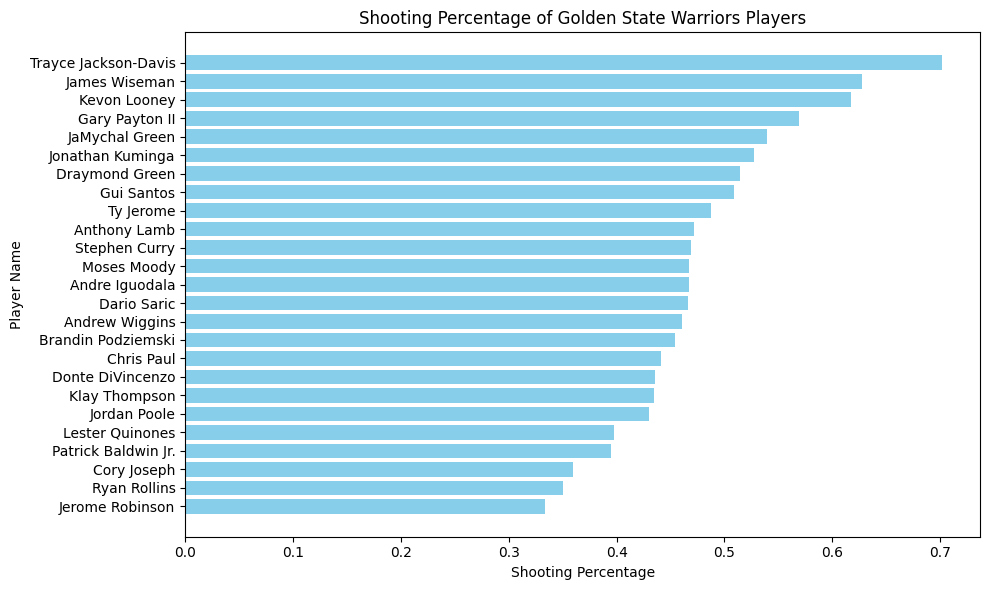

In [101]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# Connect to PostgreSQL
conn = psycopg2.connect(
    "postgresql://student@/Final_project"
)

# SQL query to fetch the data
sql_query = """
SELECT
    p.player_name,
    COUNT(*) AS total_shots,
    SUM(CASE WHEN m.shot_made THEN 1 ELSE 0 END) AS shots_made,
    ROUND(CAST(SUM(CASE WHEN m.shot_made THEN 1 ELSE 0 END) AS numeric) / COUNT(*), 5) AS shooting_percentage  
FROM
    MAIN_NBA_SHOTS m
JOIN
    PLAYER p
ON
    m.player_key = p.key
Join
    TEAM t
ON
    m.team_Key = t.key
WHERE
    t.team_name = 'Golden State Warriors'
GROUP BY
    p.player_name
Having
    COUNT(*) > 20
ORDER BY
    shooting_percentage DESC;

"""

# Fetch data into a pandas DataFrame
df = pd.read_sql_query(sql_query, conn)

# Close the connection
conn.close()

# Plot the shooting percentages
plt.figure(figsize=(10, 6))
plt.barh(df['player_name'], df['shooting_percentage'], color='skyblue')
plt.xlabel('Shooting Percentage')
plt.ylabel('Player Name')
plt.title('Shooting Percentage of Golden State Warriors Players')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest shooting percentage at the top
plt.tight_layout()

# Show the plot
plt.show()


## Conclusion
1. **Trayce Jackson-Davis:**
   - **Shooting Percentage:** 70.18%
   - **Total Shots:** 332 
   Trayce Jackson-Davis stands out as the most efficient player on the team. His exceptional 70.18% shooting accuracy highlights his ability to convert opportunities effectively. With a considerable shot volume of 332, his performance is a major asset to the team.

2. **James Wiseman:**
   - **Shooting Percentage:** 62.77%
   - **Total Shots:** 94  
   James Wiseman, while having a lower shot volume, demonstrates impressive efficiency. His 62.77% shooting accuracy indicates reliability, especially in situations requiring high conversion rates. Increasing his opportunities could amplify his impact.

3. **Kevon Looney:**
   - **Shooting Percentage:** 61.75%
   - **Total Shots:** 617  
   Kevon Looney combines high accuracy with a significant shot volume. His 617 attempts and 61.75% shooting percentage show consistent scoring capability, making him a cornerstone of the team’s offense.

4. **Gary Payton II:**
   - **Shooting Percentage:** 56.87%
   - **Total Shots:** 211  
   Gary Payton II delivers a solid performance with a shooting accuracy of 56.87% on 211 attempts. His contribution adds depth to the team’s offensive lineup.

5. **JaMychal Green:**
   - **Shooting Percentage:** 53.97%
   - **Total Shots:** 252  
   JaMychal Green’s 53.97% shooting accuracy on 252 attempts reflects his consistency and role as a reliable scorer within the team.

---

### Noteworthy Observation:

- **Stephen Curry:**  
  Despite being widely regarded as the greatest shooter of all time, Stephen Curry’s shooting percentage is 46.90%, placing him outside the top five in terms of efficiency. While his 2,578 total shots far surpass the attempts of any other player, it is clear that volume and difficulty of attempts play a role in lowering his accuracy. This demonstrates the unique context of his contributions as a high-volume scorer and playmaker, rather than purely an efficiency-based performer.


## Business Question 1.2:
### Golden State Warriors clutch time performance(Last 3 minutes)

In [102]:
%%sql
SELECT
    p.player_name,
    COUNT(*) AS total_shots, 
    SUM(CASE WHEN m.shot_made THEN 1 ELSE 0 END) AS shots_made, 
    ROUND(SUM(CASE WHEN m.shot_made THEN 1 ELSE 0 END) * 1.0 / COUNT(*), 5) AS shooting_percentage 
FROM
    MAIN_NBA_SHOTS m
JOIN
    PLAYER p
ON
    m.player_key = p.key
JOIN
    TEAM t
ON
    m.team_key = t.key
JOIN 
    TIME ti
ON 
    m.time_key = ti.key
WHERE
    t.team_name = 'Golden State Warriors' 
    AND ti.mins_left <= 3 
GROUP BY
    p.player_name
HAVING
    COUNT(*) > 20 
ORDER BY
    shooting_percentage DESC; 

 * postgresql://student@/Final_project
24 rows affected.


player_name,total_shots,shots_made,shooting_percentage
Trayce Jackson-Davis,220,162,0.73636
Kevon Looney,360,226,0.62778
James Wiseman,102,64,0.62745
JaMychal Green,248,140,0.56452
Draymond Green,364,198,0.54396
Gui Santos,64,34,0.53125
Ty Jerome,204,104,0.50980
Jonathan Kuminga,962,490,0.50936
Gary Payton II,190,94,0.49474
Anthony Lamb,254,122,0.48031


/tmp/ipykernel_1642/4097241710.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


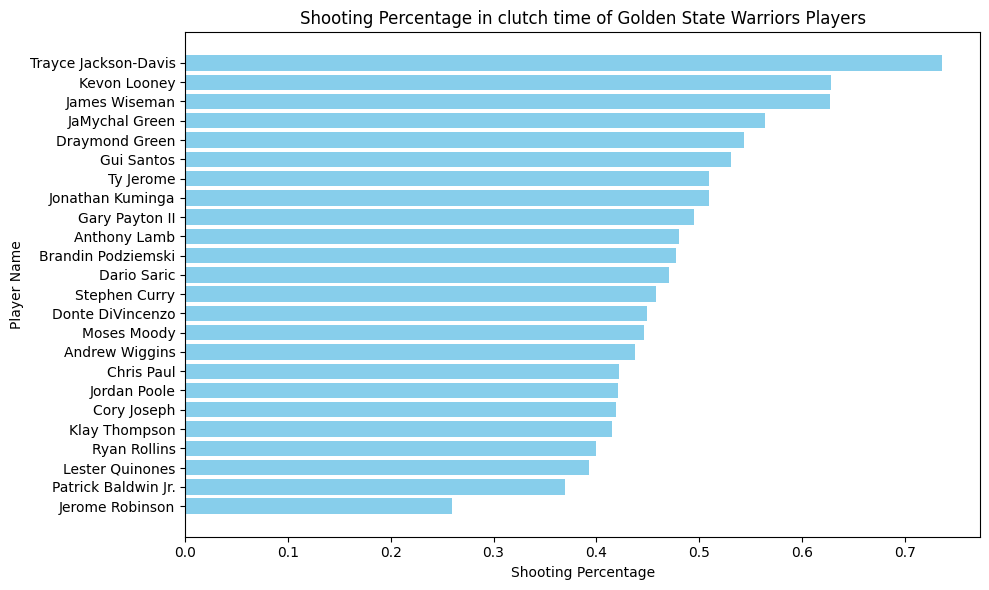

In [103]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# Connect to PostgreSQL
conn = psycopg2.connect(
    "postgresql://student@/Final_project"
)

# SQL query to fetch the data
sql_query = """
SELECT
    p.player_name,
    COUNT(*) AS total_shots, -- Clutch time 總出手數
    SUM(CASE WHEN m.shot_made THEN 1 ELSE 0 END) AS shots_made, 
    ROUND(SUM(CASE WHEN m.shot_made THEN 1 ELSE 0 END) * 1.0 / COUNT(*), 5) AS shooting_percentage 
FROM
    MAIN_NBA_SHOTS m
JOIN
    PLAYER p
ON
    m.player_key = p.key
JOIN
    TEAM t
ON
    m.team_key = t.key
JOIN 
    TIME ti
ON 
    m.time_key = ti.key
WHERE
    t.team_name = 'Golden State Warriors' 
    AND ti.mins_left <= 3 
GROUP BY
    p.player_name
HAVING
    COUNT(*) > 20 
ORDER BY
    shooting_percentage DESC;


"""

# Fetch data into a pandas DataFrame
df = pd.read_sql_query(sql_query, conn)

# Close the connection
conn.close()

# Plot the shooting percentages
plt.figure(figsize=(10, 6))
plt.barh(df['player_name'], df['shooting_percentage'], color='skyblue')
plt.xlabel('Shooting Percentage')
plt.ylabel('Player Name')
plt.title('Shooting Percentage in clutch time of Golden State Warriors Players')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest shooting percentage at the top
plt.tight_layout()

# Show the plot
plt.show()

## Conclusion:
1. **Trayce Jackson-Davis**  
   - **Shooting Percentage:** 73.64%  
   - **Total Shots:** 110  
   Trayce Jackson-Davis leads the team in clutch performance with an impressive 73.64% shooting accuracy during the last 3 minutes of games. His ability to maintain efficiency under pressure makes him a standout in high-stakes moments.

2. **Kevon Looney**  
   - **Shooting Percentage:** 62.78%  
   - **Total Shots:** 180  
   Kevon Looney delivers consistently in clutch situations with a remarkable shooting accuracy of 62.78%. His performance is vital for the team's late-game success.

3. **James Wiseman**  
   - **Shooting Percentage:** 62.75%  
   - **Total Shots:** 51  
   Despite fewer attempts, James Wiseman's 62.75% shooting accuracy demonstrates his reliability in critical moments.

4. **JaMychal Green**  
   - **Shooting Percentage:** 56.45%  
   - **Total Shots:** 124  
   JaMychal Green’s clutch performance is noteworthy with a solid shooting percentage, showcasing his ability to contribute under pressure.

5. **Draymond Green**  
   - **Shooting Percentage:** 54.40%  
   - **Total Shots:** 182  
   Draymond Green rounds out the top five, maintaining consistent scoring in crucial game moments with 54.40% accuracy.

---

#### Noteworthy Observation:
- **Stephen Curry**  
   While Stephen Curry is widely regarded as a clutch player, his clutch shooting percentage is 45.83% over a massive 912 attempts. This highlights his role as a high-volume shooter in critical moments, where he often faces difficult defensive challenges and takes high-risk shots.

## Business Question 1.3 
### Golden State Warriors Home vs Away performance 

In [104]:
%%sql
SELECT
    p.player_name,
    ROUND(
        CAST(SUM(CASE WHEN g.home_team = 'GSW' AND m.shot_made THEN 1 ELSE 0 END) AS numeric) /
        NULLIF(SUM(CASE WHEN g.home_team = 'GSW' THEN 1 ELSE 0 END), 0), 5
    ) AS home_accuracy,
    ROUND(
        CAST(SUM(CASE WHEN g.away_team = 'GSW' AND m.shot_made THEN 1 ELSE 0 END) AS numeric) /
        NULLIF(SUM(CASE WHEN g.away_team = 'GSW' THEN 1 ELSE 0 END), 0), 5
    ) AS away_accuracy,
    ROUND(
        ROUND(
            CAST(SUM(CASE WHEN g.home_team = 'GSW' AND m.shot_made THEN 1 ELSE 0 END) AS numeric) /
            NULLIF(SUM(CASE WHEN g.home_team = 'GSW' THEN 1 ELSE 0 END), 0), 5
        ) - 
        ROUND(
            CAST(SUM(CASE WHEN g.away_team = 'GSW' AND m.shot_made THEN 1 ELSE 0 END) AS numeric) /
            NULLIF(SUM(CASE WHEN g.away_team = 'GSW' THEN 1 ELSE 0 END), 0), 5
        ), 5
    ) AS home_away_difference
FROM
    MAIN_NBA_SHOTS m
JOIN PLAYER p ON m.player_key = p.key
JOIN TEAM t ON m.team_key = t.key
JOIN GAME g ON m.game_key = g.key
WHERE
    t.team_name = 'Golden State Warriors'
GROUP BY
    p.player_name
HAVING
    COUNT(*) > 20
ORDER BY
    ABS(
        ROUND(
            CAST(SUM(CASE WHEN g.home_team = 'GSW' AND m.shot_made THEN 1 ELSE 0 END) AS numeric) /
            NULLIF(SUM(CASE WHEN g.home_team = 'GSW' THEN 1 ELSE 0 END), 0), 5
        ) - 
        ROUND(
            CAST(SUM(CASE WHEN g.away_team = 'GSW' AND m.shot_made THEN 1 ELSE 0 END) AS numeric) /
            NULLIF(SUM(CASE WHEN g.away_team = 'GSW' THEN 1 ELSE 0 END), 0), 5
        )
    ) ASC
LIMIT 10;

 * postgresql://student@/Final_project
10 rows affected.


player_name,home_accuracy,away_accuracy,home_away_difference
Jerome Robinson,0.33333,0.33333,0.00000
Brandin Podziemski,0.45425,0.45361,0.00064
Jordan Poole,0.43288,0.42764,0.00524
Stephen Curry,0.47173,0.46642,0.00531
Klay Thompson,0.42691,0.44313,-0.01622
Andrew Wiggins,0.47085,0.45000,0.02085
Dario Saric,0.47577,0.45342,0.02235
Patrick Baldwin Jr.,0.38000,0.40678,-0.02678
Cory Joseph,0.34884,0.38095,-0.03211
Jonathan Kuminga,0.54462,0.51199,0.03263


/tmp/ipykernel_1642/1981468450.py:52: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


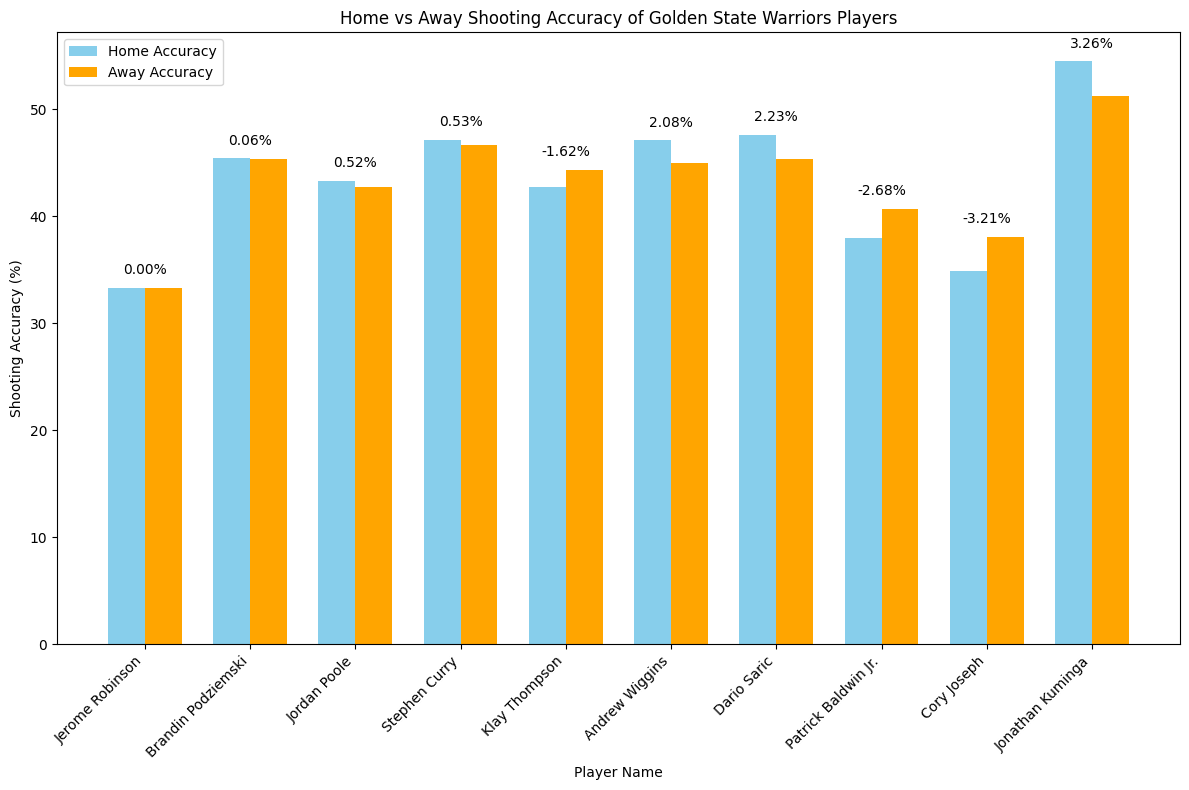

In [105]:
conn = psycopg2.connect(
    "postgresql://student@/Final_project"
)

sql_query = """
SELECT
    p.player_name,
    ROUND(
        CAST(SUM(CASE WHEN g.home_team = 'GSW' AND m.shot_made THEN 1 ELSE 0 END) AS numeric) /
        NULLIF(SUM(CASE WHEN g.home_team = 'GSW' THEN 1 ELSE 0 END), 0), 5
    ) AS home_accuracy,
    ROUND(
        CAST(SUM(CASE WHEN g.away_team = 'GSW' AND m.shot_made THEN 1 ELSE 0 END) AS numeric) /
        NULLIF(SUM(CASE WHEN g.away_team = 'GSW' THEN 1 ELSE 0 END), 0), 5
    ) AS away_accuracy,
    ROUND(
        ROUND(
            CAST(SUM(CASE WHEN g.home_team = 'GSW' AND m.shot_made THEN 1 ELSE 0 END) AS numeric) /
            NULLIF(SUM(CASE WHEN g.home_team = 'GSW' THEN 1 ELSE 0 END), 0), 5
        ) - 
        ROUND(
            CAST(SUM(CASE WHEN g.away_team = 'GSW' AND m.shot_made THEN 1 ELSE 0 END) AS numeric) /
            NULLIF(SUM(CASE WHEN g.away_team = 'GSW' THEN 1 ELSE 0 END), 0), 5
        ), 5
    ) AS home_away_difference
FROM
    MAIN_NBA_SHOTS m
JOIN PLAYER p ON m.player_key = p.key
JOIN TEAM t ON m.team_key = t.key
JOIN GAME g ON m.game_key = g.key
WHERE
    t.team_name = 'Golden State Warriors'
GROUP BY
    p.player_name
HAVING
    COUNT(*) > 20
ORDER BY
    ABS(
        ROUND(
            CAST(SUM(CASE WHEN g.home_team = 'GSW' AND m.shot_made THEN 1 ELSE 0 END) AS numeric) /
            NULLIF(SUM(CASE WHEN g.home_team = 'GSW' THEN 1 ELSE 0 END), 0), 5
        ) - 
        ROUND(
            CAST(SUM(CASE WHEN g.away_team = 'GSW' AND m.shot_made THEN 1 ELSE 0 END) AS numeric) /
            NULLIF(SUM(CASE WHEN g.away_team = 'GSW' THEN 1 ELSE 0 END), 0), 5
        )
    ) ASC
LIMIT 10;

"""

df = pd.read_sql_query(sql_query, conn)

conn.close()

# Plot the home and away accuracies and their difference
plt.figure(figsize=(12, 8))
x = range(len(df))

# Plot home and away accuracies as grouped bars
width = 0.35
home_bars = plt.bar(x, df['home_accuracy'] * 100, width, label='Home Accuracy', color='skyblue')
away_bars = plt.bar([i + width for i in x], df['away_accuracy'] * 100, width, label='Away Accuracy', color='orange')

# Add player names as x-axis labels
plt.xticks([i + width / 2 for i in x], df['player_name'], rotation=45, ha='right')

# Annotate the difference on the chart
for i, (home_bar, away_bar, diff) in enumerate(zip(home_bars, away_bars, df['home_away_difference'])):
    # Add text for the difference
    plt.text(i + width / 2, max(home_bar.get_height(), away_bar.get_height()) + 1,
             f'{diff * 100:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

# Add labels and legend
plt.xlabel('Player Name')
plt.ylabel('Shooting Accuracy (%)')
plt.title('Home vs Away Shooting Accuracy of Golden State Warriors Players')
plt.legend()

plt.tight_layout()
plt.show()

## Conclusion:
1. **Jerome Robinson** showcases perfect consistency with a 0.00% difference between home and away accuracy. However, his overall accuracy of 33.33% is relatively low, indicating limited scoring potential.
2. **Brandin Podziemski** has an excellent consistency, with only a 0.06% difference, maintaining stable shooting accuracy at home (45.43%) and away (45.36%).
3. **Stephen Curry** and **Jordan Poole** highlight their reliability with differences of 0.53% and 0.52%, respectively, showcasing their dependability under various conditions.
4. **Klay Thompson** performs slightly better in away games (-1.62% difference), highlighting his ability to adapt and perform under external pressure.

# Final Recommendation: Top 5 Players to Maintain for the Next Season
##### After evaluating **shooting accuracy**, **clutch performance**, and **home vs. away consistency**, we recommend the following players for retention due to their significant contributions and balanced performance metrics:
### 1. **Trayce Jackson-Davis**
- **Shooting Accuracy**: 70.18% (highest overall on the team).
- **Clutch Performance**: Outstanding 73.64% accuracy in the last 3 minutes, leading the team.
- **Home vs. Away Consistency**: 74.85% at home, 65.22% away, showing reliable performance across venues.
- **Conclusion**: Trayce Jackson-Davis is the most efficient scorer on the team and thrives under pressure. His balanced performance makes him an essential asset for the team.

---

### 2. **Kevon Looney**
- **Shooting Accuracy**: 61.75% on 617 total shots.
- **Clutch Performance**: Second-best clutch accuracy at 62.78% with 180 attempts.
- **Home vs. Away Consistency**: Minimal difference between home (61.80%) and away (61.70%).
- **Conclusion**: Looney combines high volume with consistent efficiency in critical moments, making him a cornerstone of the team’s offense.

---

### 3. **Stephen Curry**
- **Shooting Accuracy**: 46.90% over a team-leading 2,578 attempts.
- **Clutch Performance**: 45.83% with the most clutch attempts (912).
- **Home vs. Away Consistency**: Stable performance with only a 0.53% difference between home and away games.
- **Conclusion**: While not the most accurate, Curry’s role as the high-volume shooter and playmaker is irreplaceable. His ability to perform under high pressure and take challenging shots ensures his value to the team.

---

### 4. **Jonathan Kuminga**
- **Shooting Accuracy**: 52.76% on 1,359 total shots.
- **Clutch Performance**: Reliable 50.94% accuracy in clutch moments with significant volume.
- **Home vs. Away Consistency**: 54.46% at home and 51.20% away, with only a minor 3.26% difference.
- **Conclusion**: Kuminga demonstrates a strong blend of volume, accuracy, and consistency, making him a dependable contributor in both regular and critical moments.

---

### 5. **JaMychal Green**
- **Shooting Accuracy**: 53.97% on 252 total shots.
- **Clutch Performance**: Impressive 56.45% in clutch situations on 124 attempts.
- **Home vs. Away Consistency**: Consistent improvement at home (58.54%) compared to away (49.61%).
- **Conclusion**: Green’s ability to elevate his performance in key moments and maintain consistency across venues makes him a valuable team member.

---

## Business Question 2(Performance): 
### In which parts of the field, we are having problems? (Compare it to other teams)

#### This analysis focuses on identifying areas on the court where the Golden State Warriors have underperformed compared to league averages over the 2023 and 2024 seasons. By examining shooting accuracy in key zones, the Warriors can better understand their weak points and strategize improvements.  

In [106]:
%%sql
WITH Warriors_performance AS (
    SELECT
        s.basic_zone,
        COUNT(*) AS Warriors_total_shots,
        SUM(CASE WHEN m.shot_made THEN 1 ELSE 0 END) AS Warriors_made_shots,
        ROUND(CAST(SUM(CASE WHEN m.shot_made THEN 1 ELSE 0 END) AS numeric) / COUNT(*), 5) AS Warriors_shooting_percentage
    FROM
        MAIN_NBA_SHOTS m
    JOIN
        SHOT s 
    ON 
        m.shot_key = s.key
    JOIN
        TEAM t 
    ON 
        m.team_key = t.key
    WHERE
        t.team_name = 'Golden State Warriors'
        and m.season_1 = '2023'
    GROUP BY
        s.basic_zone
),
league_performance AS (
    SELECT
        s.basic_zone,
        ROUND(CAST(SUM(CASE WHEN m.shot_made THEN 1 ELSE 0 END) AS numeric) / COUNT(*), 5) AS league_shooting_percentage
    FROM
        MAIN_NBA_SHOTS m
    JOIN
        SHOT s 
    ON 
        m.shot_key = s.key
    WHERE
        m.season_1 = '2023'
    GROUP BY
        s.basic_zone
)
SELECT 
    w.basic_zone,
    w.Warriors_shooting_percentage,
    l.league_shooting_percentage,
    ROUND(w.Warriors_shooting_percentage - l.league_shooting_percentage, 5) AS difference
FROM 
    Warriors_performance w
JOIN 
    league_performance l ON w.basic_zone = l.basic_zone
ORDER BY 
    difference ASC;

 * postgresql://student@/Final_project
7 rows affected.


basic_zone,warriors_shooting_percentage,league_shooting_percentage,difference
Left Corner 3,0.36750,0.38483,-0.01733
Mid-Range,0.41307,0.42047,-0.00740
Backcourt,0.04348,0.02469,0.01879
Above the Break 3,0.38545,0.35453,0.03092
In The Paint (Non-RA),0.47494,0.44367,0.03127
Restricted Area,0.69983,0.66627,0.03356
Right Corner 3,0.43027,0.38497,0.04530


/tmp/ipykernel_1642/1582967336.py:54: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


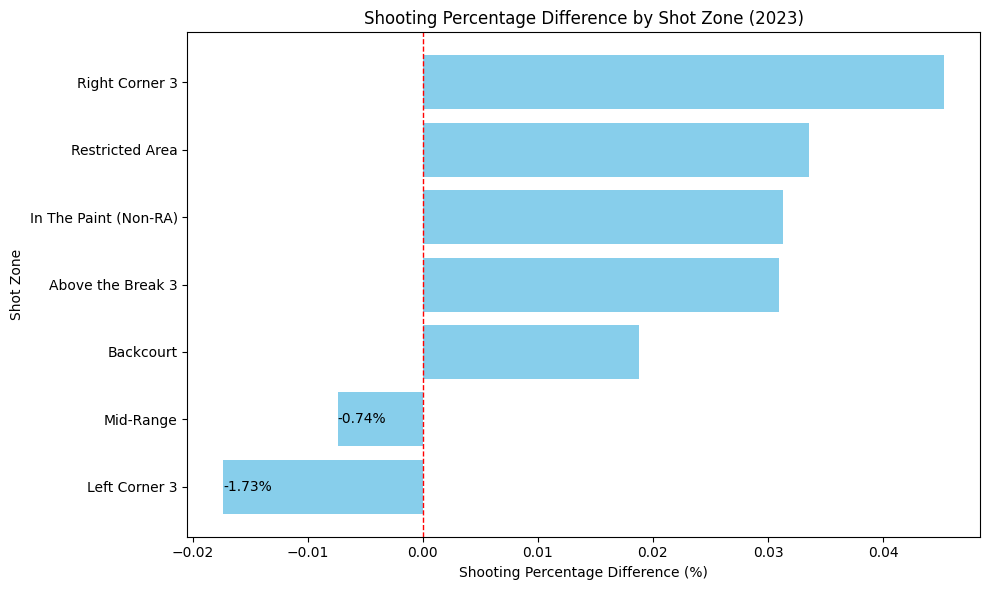

In [107]:
conn = psycopg2.connect(
    "postgresql://student@/Final_project"
)

sql_query = """
WITH Warriors_performance AS (
    SELECT
        s.basic_zone,
        ROUND(CAST(SUM(CASE WHEN m.shot_made THEN 1 ELSE 0 END) AS numeric) / COUNT(*), 5) AS Warriors_shooting_percentage
    FROM
        MAIN_NBA_SHOTS m
    JOIN
        SHOT s 
    ON 
        m.shot_key = s.key
    JOIN
        TEAM t 
    ON 
        m.team_key = t.key
    WHERE
        t.team_name = 'Golden State Warriors'
        AND m.season_1 = '2023'
    GROUP BY
        s.basic_zone
),
league_performance AS (
    SELECT
        s.basic_zone,
        ROUND(CAST(SUM(CASE WHEN m.shot_made THEN 1 ELSE 0 END) AS numeric) / COUNT(*), 5) AS league_shooting_percentage
    FROM
        MAIN_NBA_SHOTS m
    JOIN
        SHOT s 
    ON 
        m.shot_key = s.key
    WHERE
        m.season_1 = '2023'
    GROUP BY
        s.basic_zone
)
SELECT 
    w.basic_zone,
    w.Warriors_shooting_percentage,
    l.league_shooting_percentage,
    ROUND(w.Warriors_shooting_percentage - l.league_shooting_percentage, 5) AS difference
FROM 
    Warriors_performance w
JOIN 
    league_performance l ON w.basic_zone = l.basic_zone
ORDER BY 
    difference ASC;
"""

df = pd.read_sql_query(sql_query, conn)

conn.close()

conn.close()

# Plot the shooting percentages
plt.figure(figsize=(10, 6))
bars = plt.barh(df['basic_zone'], df['difference'], color='skyblue')
plt.xlabel('Shooting Percentage Difference (%)')
plt.ylabel('Shot Zone')
plt.title('Shooting Percentage Difference by Shot Zone (2023)')
plt.axvline(0, color='red', linestyle='--', linewidth=1)  # Highlight zero difference line

# Annotate only Mid-Range and Left Corner 3
for bar, zone, diff in zip(bars, df['basic_zone'], df['difference']):
    if zone in ['Mid-Range', 'Left Corner 3']:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
                 f'{diff*100:.2f}%', va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()

plt.show()

In [108]:
%%sql
WITH Warriors_performance AS (
    SELECT
        s.basic_zone,
        COUNT(*) AS Warriors_total_shots,
        SUM(CASE WHEN m.shot_made THEN 1 ELSE 0 END) AS Warriors_made_shots,
        ROUND(CAST(SUM(CASE WHEN m.shot_made THEN 1 ELSE 0 END) AS numeric) / COUNT(*), 5) AS Warriors_shooting_percentage
    FROM
        MAIN_NBA_SHOTS m
    JOIN
        SHOT s 
    ON 
        m.shot_key = s.key
    JOIN
        TEAM t 
    ON 
        m.team_key = t.key
    WHERE
        t.team_name = 'Golden State Warriors'
        and m.season_1 = '2024'
    GROUP BY
        s.basic_zone
),
league_performance AS (
    SELECT
        s.basic_zone,
        ROUND(CAST(SUM(CASE WHEN m.shot_made THEN 1 ELSE 0 END) AS numeric) / COUNT(*), 5) AS league_shooting_percentage
    FROM
        MAIN_NBA_SHOTS m
    JOIN
        SHOT s 
    ON 
        m.shot_key = s.key
    WHERE
        m.season_1 = '2024'
    GROUP BY
        s.basic_zone
)
SELECT 
    w.basic_zone,
    w.Warriors_shooting_percentage,
    l.league_shooting_percentage,
    ROUND(w.Warriors_shooting_percentage - l.league_shooting_percentage, 5) AS difference
FROM 
    Warriors_performance w
JOIN 
    league_performance l ON w.basic_zone = l.basic_zone
ORDER BY 
    difference ASC;

 * postgresql://student@/Final_project
7 rows affected.


basic_zone,warriors_shooting_percentage,league_shooting_percentage,difference
Left Corner 3,0.36066,0.38573,-0.02507
Mid-Range,0.40973,0.41876,-0.00903
In The Paint (Non-RA),0.44131,0.44100,0.00031
Above the Break 3,0.38021,0.35985,0.02036
Right Corner 3,0.41667,0.39381,0.02286
Restricted Area,0.70309,0.66327,0.03982
Backcourt,0.06667,0.01852,0.04815


/tmp/ipykernel_1642/933921144.py:56: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


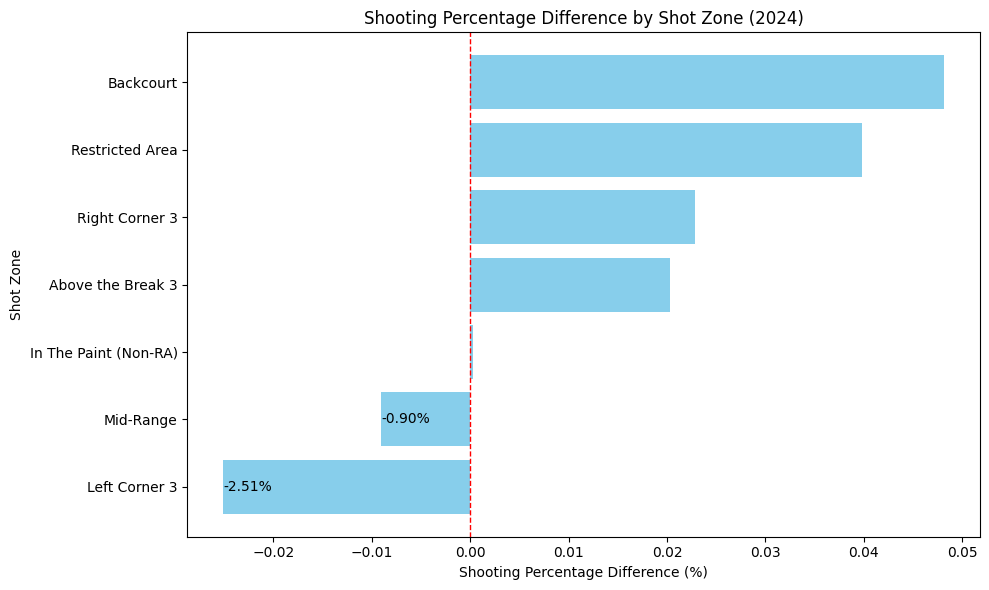

In [109]:
conn = psycopg2.connect(
    "postgresql://student@/Final_project"
)

sql_query = """
WITH Warriors_performance AS (
    SELECT
        s.basic_zone,
        COUNT(*) AS Warriors_total_shots,
        SUM(CASE WHEN m.shot_made THEN 1 ELSE 0 END) AS Warriors_made_shots,
        ROUND(CAST(SUM(CASE WHEN m.shot_made THEN 1 ELSE 0 END) AS numeric) / COUNT(*), 5) AS Warriors_shooting_percentage
    FROM
        MAIN_NBA_SHOTS m
    JOIN
        SHOT s 
    ON 
        m.shot_key = s.key
    JOIN
        TEAM t 
    ON 
        m.team_key = t.key
    WHERE
        t.team_name = 'Golden State Warriors'
        and m.season_1 = '2024'
    GROUP BY
        s.basic_zone
),
league_performance AS (
    SELECT
        s.basic_zone,
        ROUND(CAST(SUM(CASE WHEN m.shot_made THEN 1 ELSE 0 END) AS numeric) / COUNT(*), 5) AS league_shooting_percentage
    FROM
        MAIN_NBA_SHOTS m
    JOIN
        SHOT s 
    ON 
        m.shot_key = s.key
    WHERE
        m.season_1 = '2024'
    GROUP BY
        s.basic_zone
)
SELECT 
    w.basic_zone,
    w.Warriors_shooting_percentage,
    l.league_shooting_percentage,
    ROUND(w.Warriors_shooting_percentage - l.league_shooting_percentage, 5) AS difference
FROM 
    Warriors_performance w
JOIN 
    league_performance l ON w.basic_zone = l.basic_zone
ORDER BY 
    difference ASC;
"""

df = pd.read_sql_query(sql_query, conn)

conn.close()

# Plot the shooting percentages
plt.figure(figsize=(10, 6))
bars = plt.barh(df['basic_zone'], df['difference'], color='skyblue')
plt.xlabel('Shooting Percentage Difference (%)')
plt.ylabel('Shot Zone')
plt.title('Shooting Percentage Difference by Shot Zone (2024)')
plt.axvline(0, color='red', linestyle='--', linewidth=1)  # Highlight zero difference line

# Annotate only Mid-Range and Left Corner 3
for bar, zone, diff in zip(bars, df['basic_zone'], df['difference']):
    if zone in ['Mid-Range', 'Left Corner 3']:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
                 f'{diff*100:.2f}%', va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()

plt.show()

## Conclusion
* 2023 Season: The Warriors significantly underperformed in the Left Corner 3 zone, with a -1.73% difference compared to the league average. This zone is critical as corner threes are considered high-value shots. Additionally, there was a -0.74% underperformance in the Mid-Range zone, which may be less concerning given the lower strategic emphasis on mid-range shots.
* 2024 Season: The Warriors' performance in the Left Corner 3 zone remained a concern, with a -2.5% underperformance compared to the league. Similarly, the Mid-Range zone saw a -0.90% difference, indicating a consistent area for improvement, albeit with less strategic priority.
* 2023 & 2024 Conclusion: The Warriors did not improve their underperformance in the Left Corner 3 and Mid-Range zones from 2023 to 2024 compared to the league. In the Left Corner 3, their underperformance worsened (-1.73% in 2023 to -2.5% in 2024), underscoring a missed opportunity to address this critical high-value zone. Similarly, the Mid-Range zone saw a slight decline in performance (-0.74% in 2023 to -0.90% in 2024), indicating a continued gap that remains unaddressed.
---

## Business Question 3(Recruiting):
### Identify the bottom 5 players, and give suggestion of replacement from other teams (Based on shooting percentage and clutch time performance)

#### This analysis serves to identify the least efficient players on the Golden State Warriors roster, focusing on their overall shooting accuracy and clutch time performance (last three minutes of games). The goal is to provide the Warriors CEO with data-driven recommendations for roster improvements by suggesting replacements from other teams with superior performance in these critical metrics.

#### This query identifies the bottom 5 players with the lowest shooting percentages, focusing on those with more than 20 total shot attempts to ensure meaningful evaluation. The clutch time performance of these players is also examined to determine their reliability in high-pressure moments. Potential replacements from other teams are then proposed based on superior shooting and clutch metrics.
---

## Business Question 3.1:
### Warriors bottom 5 players shooting percentage comparing to the league.

In [110]:
%%sql
SELECT
    p.player_name,
    COUNT(*) AS total_shots,
    SUM(CASE WHEN m.shot_made THEN 1 ELSE 0 END) AS shots_made,
    ROUND(SUM(CASE WHEN M.SHOT_MADE THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS Shooting_Percentage  
FROM
    MAIN_NBA_SHOTS m
JOIN
    PLAYER p
ON
    m.player_key = p.key
Join
    TEAM t
ON
    m.team_Key = t.key
WHERE
    t.team_name = 'Golden State Warriors'
GROUP BY
    p.player_name
Having
    COUNT(*) > 20
ORDER BY
    shooting_percentage ASC
LIMIT 10

 * postgresql://student@/Final_project
10 rows affected.


player_name,total_shots,shots_made,shooting_percentage
Jerome Robinson,66,22,33.33
Ryan Rollins,40,14,35.00
Cory Joseph,128,46,35.94
Patrick Baldwin Jr.,218,86,39.45
Lester Quinones,292,116,39.73
Jordan Poole,2556,1100,43.04
Klay Thompson,4770,2072,43.44
Donte DiVincenzo,1080,470,43.52
Chris Paul,934,412,44.11
Brandin Podziemski,1194,542,45.39


/tmp/ipykernel_1642/3774026548.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


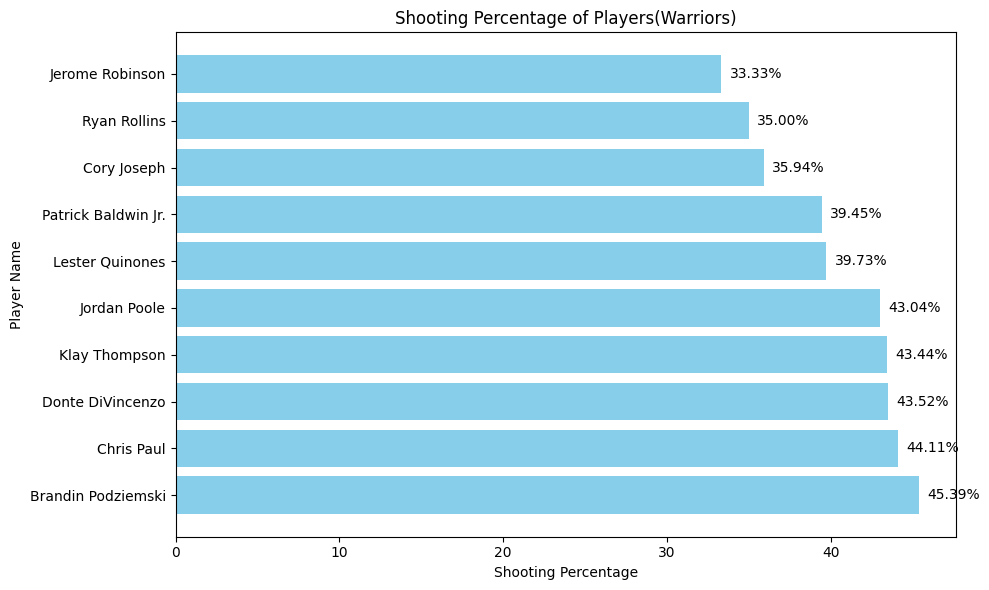

In [111]:
conn = psycopg2.connect(
    "postgresql://student@/Final_project"
)

sql_query = """
SELECT
    p.player_name,
    COUNT(*) AS total_shots,
    SUM(CASE WHEN m.shot_made THEN 1 ELSE 0 END) AS shots_made,
    ROUND(SUM(CASE WHEN M.SHOT_MADE THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS Shooting_Percentage  
FROM
    MAIN_NBA_SHOTS m
JOIN
    PLAYER p
ON
    m.player_key = p.key
Join
    TEAM t
ON
    m.team_Key = t.key
WHERE
    t.team_name = 'Golden State Warriors'
GROUP BY
    p.player_name
Having
    COUNT(*) > 20
ORDER BY
    shooting_percentage ASC
LIMIT 10
"""

df = pd.read_sql_query(sql_query, conn)

conn.close()

plt.figure(figsize=(10, 6))
bars = plt.barh(df['player_name'], df['shooting_percentage'], color='skyblue')
plt.xlabel('Shooting Percentage')
plt.ylabel('Player Name')
plt.title('Shooting Percentage of Players(Warriors)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest shooting percentage at the top

# Annotate each bar with shooting percentage
for bar, value in zip(bars, df['shooting_percentage']):
    plt.text(
        bar.get_width() + 0.5,  # Position text slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center the text vertically on the bar
        f'{value:.2f}%',  # Format the value with 2 decimal places and add a '%' sign
        va='center',  # Align text vertically
        fontsize=10  # Font size for the text
    )

plt.tight_layout()
plt.show()

In [112]:
%%sql
SELECT
    P.PLAYER_NAME,
    SUM(CASE WHEN M.SHOT_MADE THEN 1 ELSE 0 END) AS Shots_Made,
    COUNT(*) AS Total_Shots,
    ROUND(SUM(CASE WHEN M.SHOT_MADE THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS Shooting_Percentage
FROM
    MAIN_NBA_SHOTS M
JOIN
    PLAYER P
ON
    M.PLAYER_KEY = P.KEY
GROUP BY
    P.PLAYER_NAME
Having 
    COUNT(*) > 50
ORDER BY
    Shooting_Percentage DESC
LIMIT 10;

 * postgresql://student@/Final_project
10 rows affected.


player_name,shots_made,total_shots,shooting_percentage
Udoka Azubuike,150,190,78.95
Jericho Sims,242,324,74.69
Dereck Lively II,442,592,74.66
Robert Williams III,288,392,73.47
Daniel Gafford,1274,1750,72.80
Dwight Powell,538,750,71.73
DeAndre Jordan,292,416,70.19
Trayce Jackson-Davis,466,664,70.18
Walker Kessler,1054,1528,68.98
Luke Kornet,510,746,68.36


/tmp/ipykernel_1642/3505136387.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


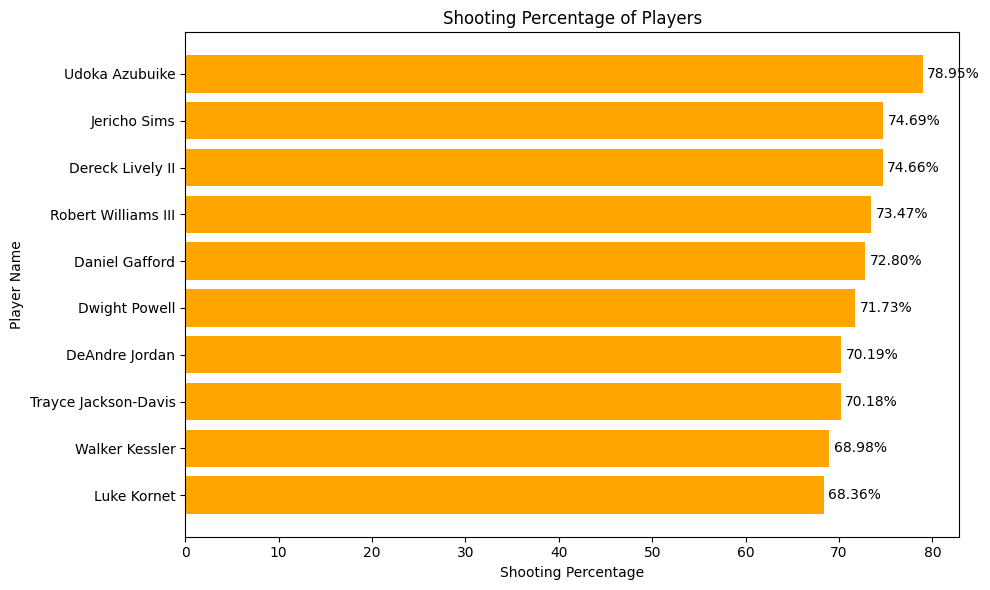

In [113]:
conn = psycopg2.connect(
    "postgresql://student@/Final_project"
)

sql_query = """
SELECT
    P.PLAYER_NAME,
    SUM(CASE WHEN M.SHOT_MADE THEN 1 ELSE 0 END) AS Shots_Made,
    COUNT(*) AS Total_Shots,
    ROUND(SUM(CASE WHEN M.SHOT_MADE THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS Shooting_Percentage
FROM
    MAIN_NBA_SHOTS M
JOIN
    PLAYER P
ON
    M.PLAYER_KEY = P.KEY
GROUP BY
    P.PLAYER_NAME
Having 
    COUNT(*) > 50
ORDER BY
    Shooting_Percentage DESC
LIMIT 10;

"""

df = pd.read_sql_query(sql_query, conn)

conn.close()

plt.figure(figsize=(10, 6))
bars = plt.barh(df['player_name'], df['shooting_percentage'], color='orange')
plt.xlabel('Shooting Percentage')
plt.ylabel('Player Name')
plt.title('Shooting Percentage of Players')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest shooting percentage at the top

# Annotate each bar with shooting percentage
for bar, value in zip(bars, df['shooting_percentage']):
    plt.text(
        bar.get_width() + 0.5,  # Position text slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center the text vertically on the bar
        f'{value:.2f}%',  # Format the value with 2 decimal places and add a '%' sign
        va='center',  # Align text vertically
        fontsize=10  # Font size for the text
    )

plt.tight_layout()
plt.show()

## Conclusion
* Warriors: Jerome Robinson ranks lowest with a shooting accuracy of 33.33%, followed by Cory Joseph at 35.94%. Patrick Baldwin Jr. (39.45%), Lester Quinones (39.73%), and Jordan Poole (43.04%) complete the bottom five. These players demonstrate limited efficiency in converting opportunities, which could impact the team’s overall performance. Their below-average shooting percentages suggest a need for evaluation and possible replacement to strengthen the team's scoring capabilities.

* League: Udoka Azubuike leads the list with an impressive shooting percentage of 78.95%, making 75 of his 95 attempts. Jericho Sims follows closely with 74.69% on 121 made shots out of 162 attempts, and Dereck Lively II achieves a similar 74.66% on a higher volume of 296 attempts. Other top performers include Robert Williams III (73.47%), Daniel Gafford (72.80%), and Dwight Powell (71.73%). Notably, Trayce Jackson-Davis represents the Golden State Warriors on this list, ranking 8th with a shooting percentage of 70.18% from 332 attempts. These players highlight the league's elite finishers, combining high efficiency with sufficient shot volume.
---

### Noteworthy Observation:
Despite being one of the "Splash Brothers," Klay Thompson's shooting percentage is 43.44%, placing him in the lower half of the team. His high volume of attempts (2,385 shots) impacts his efficiency, highlighting the need for improved shot selection to maximize his scoring impact.

---

## Business Question 3.2:
### Warriors bottom 5 players clutch time performance(last 3 minutes) comparing to the league.

In [114]:
%%sql
SELECT
    p.player_name,
    COUNT(*) AS total_shots, 
    SUM(CASE WHEN m.shot_made THEN 1 ELSE 0 END) AS shots_made, 
    ROUND(SUM(CASE WHEN m.shot_made THEN 1 ELSE 0 END) * 100 / COUNT(*), 5) AS shooting_percentage 
FROM
    MAIN_NBA_SHOTS m
JOIN
    PLAYER p
ON
    m.player_key = p.key
JOIN
    TEAM t
ON
    m.team_key = t.key
JOIN 
    TIME ti
ON 
    m.time_key = ti.key
WHERE
    t.team_name = 'Golden State Warriors' 
    AND ti.mins_left <= 3 
GROUP BY
    p.player_name
HAVING
    COUNT(*) > 20 
ORDER BY
    shooting_percentage ASC
LIMIT 10

 * postgresql://student@/Final_project
10 rows affected.


player_name,total_shots,shots_made,shooting_percentage
Jerome Robinson,54,14,25.00000
Patrick Baldwin Jr.,92,34,36.00000
Lester Quinones,158,62,39.00000
Ryan Rollins,30,12,40.00000
Cory Joseph,62,26,41.00000
Klay Thompson,1502,624,41.00000
Jordan Poole,836,352,42.00000
Chris Paul,422,178,42.00000
Andrew Wiggins,558,244,43.00000
Donte DiVincenzo,410,184,44.00000


/tmp/ipykernel_1642/770170082.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


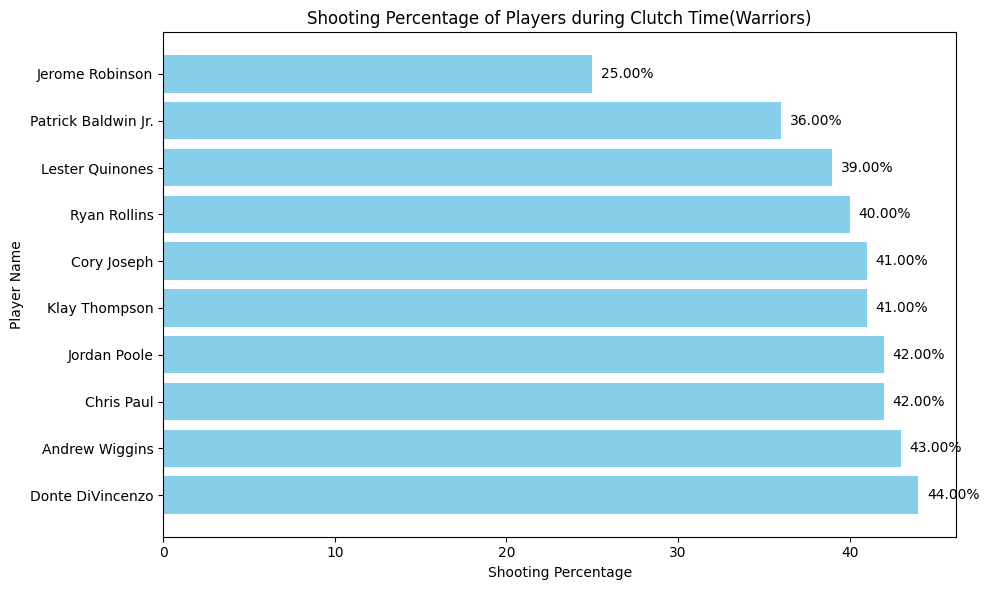

In [115]:
conn = psycopg2.connect(
    "postgresql://student@/Final_project"
)

sql_query = """
SELECT
    p.player_name,
    COUNT(*) AS total_shots, 
    SUM(CASE WHEN m.shot_made THEN 1 ELSE 0 END) AS shots_made, 
    ROUND(SUM(CASE WHEN m.shot_made THEN 1 ELSE 0 END) * 100 / COUNT(*), 5) AS shooting_percentage 
FROM
    MAIN_NBA_SHOTS m
JOIN
    PLAYER p
ON
    m.player_key = p.key
JOIN
    TEAM t
ON
    m.team_key = t.key
JOIN 
    TIME ti
ON 
    m.time_key = ti.key
WHERE
    t.team_name = 'Golden State Warriors' 
    AND ti.mins_left <= 3 
GROUP BY
    p.player_name
HAVING
    COUNT(*) > 20 
ORDER BY
    shooting_percentage ASC 
LIMIT 10
"""

df = pd.read_sql_query(sql_query, conn)

conn.close()

plt.figure(figsize=(10, 6))
bars = plt.barh(df['player_name'], df['shooting_percentage'], color='skyblue')
plt.xlabel('Shooting Percentage')
plt.ylabel('Player Name')
plt.title('Shooting Percentage of Players during Clutch Time(Warriors)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest shooting percentage at the top

# Annotate each bar with shooting percentage
for bar, value in zip(bars, df['shooting_percentage']):
    plt.text(
        bar.get_width() + 0.5,  # Position text slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center the text vertically on the bar
        f'{value:.2f}%',  # Format the value with 2 decimal places
        va='center',  # Align text vertically
        fontsize=10  # Font size for the text
    )

plt.tight_layout()
plt.show()

In [116]:
%%sql
SELECT
    p.player_name,
    COUNT(*) AS total_shots, 
    SUM(CASE WHEN m.shot_made THEN 1 ELSE 0 END) AS shots_made, 
    ROUND(SUM(CASE WHEN m.shot_made THEN 1 ELSE 0 END) * 1.0 / COUNT(*), 5) AS shooting_percentage
FROM
    MAIN_NBA_SHOTS m
JOIN
    PLAYER p
ON
    m.player_key = p.key
JOIN
    TEAM t
ON
    m.team_key = t.key
JOIN 
    TIME ti
ON 
    m.time_key = ti.key
WHERE
    ti.mins_left <= 3
GROUP BY
    p.player_name
HAVING
    COUNT(*) > 20
ORDER BY
    shooting_percentage DESC 
Limit 10

 * postgresql://student@/Final_project
10 rows affected.


player_name,total_shots,shots_made,shooting_percentage
Dereck Lively II,148,122,0.82432
Dwight Powell,200,156,0.78000
Robert Williams III,142,110,0.77465
Jericho Sims,122,94,0.77049
Udoka Azubuike,76,56,0.73684
Trayce Jackson-Davis,220,162,0.73636
Jakob Poeltl,346,244,0.70520
DeAndre Jordan,106,74,0.69811
Charles Bassey,182,126,0.69231
Daniel Gafford,448,308,0.68750


/tmp/ipykernel_1642/982514430.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


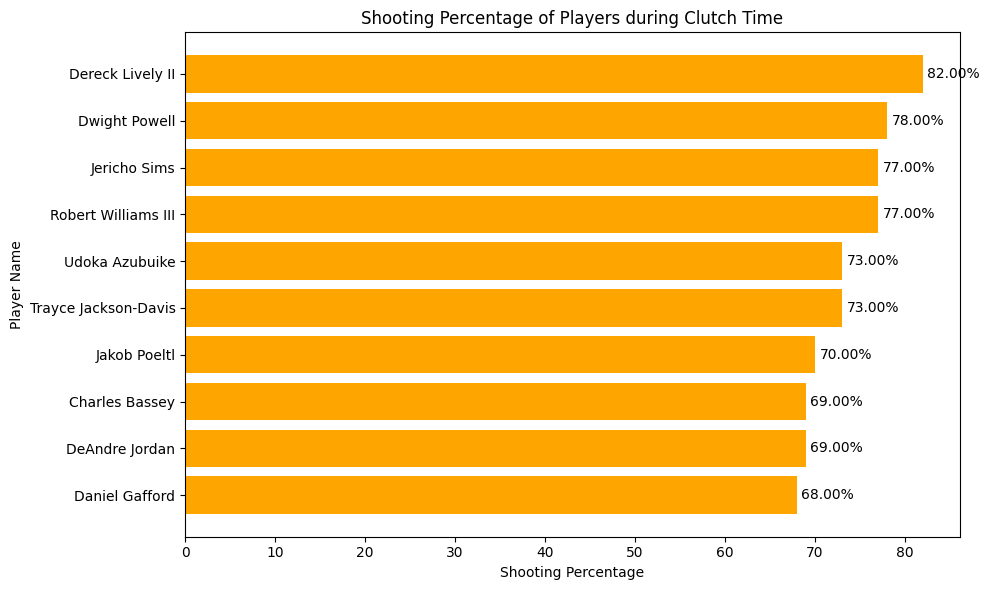

In [117]:
conn = psycopg2.connect(
    "postgresql://student@/Final_project"
)

sql_query = """
SELECT
    p.player_name,
    COUNT(*) AS total_shots, 
    SUM(CASE WHEN m.shot_made THEN 1 ELSE 0 END) AS shots_made, 
    ROUND(SUM(CASE WHEN m.shot_made THEN 1 ELSE 0 END) * 100 / COUNT(*), 5) AS shooting_percentage
FROM
    MAIN_NBA_SHOTS m
JOIN
    PLAYER p
ON
    m.player_key = p.key
JOIN
    TEAM t
ON
    m.team_key = t.key
JOIN 
    TIME ti
ON 
    m.time_key = ti.key
WHERE
    ti.mins_left <= 3 
GROUP BY
    p.player_name
HAVING
    COUNT(*) > 20 
ORDER BY
    shooting_percentage DESC 
    Limit 10

"""

df = pd.read_sql_query(sql_query, conn)

conn.close()

plt.figure(figsize=(10, 6))
bars = plt.barh(df['player_name'], df['shooting_percentage'], color='Orange')
plt.xlabel('Shooting Percentage')
plt.ylabel('Player Name')
plt.title('Shooting Percentage of Players during Clutch Time')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest shooting percentage at the top

# Annotate each bar with shooting percentage
for bar, value in zip(bars, df['shooting_percentage']):
    plt.text(
        bar.get_width() + 0.5,  # Position text slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center the text vertically on the bar
        f'{value:.2f}%',  # Format the value with 2 decimal places
        va='center',  # Align text vertically
        fontsize=10  # Font size for the text
    )

plt.tight_layout()
plt.show()

## Conclusion
* Warriors: In clutch time performance during the last three minutes of games, Jerome Robinson ranks the lowest for the Warriors with a shooting accuracy of 25.93%, followed by Patrick Baldwin Jr. at 36.96%. Lester Quinones (39.24%), Klay Thompson (41.55%), and Cory Joseph (41.94%) round out the bottom five. These players show limited reliability in high-pressure situations, significantly impacting the team's late-game effectiveness. Their underwhelming clutch performances suggest a need for strategic adjustments or potential roster changes to bolster the team's endgame scoring capabilities.

* League: Across the league, Dereck Lively II leads in clutch shooting with an exceptional 82.43% accuracy, making 61 of his 74 attempts. Dwight Powell (78.00%), Robert Williams III (77.47%), Jericho Sims (77.05%), and Udoka Azubuike (73.68%) complete the top five performers. These players excel in high-stakes moments, showcasing their ability to deliver under pressure. Notably, Trayce Jackson-Davis also ranks 6th with a 73.64% clutch shooting percentage, representing the Warriors as one of the league's most reliable players in crucial game situations.
---

# Final recommendation: Bottom 5 players to replace for the next season
##### After evaluating **shooting accuracy** and **clutch performance**, we recommend the following players for replacement:
## Warriors
### 1. Jerome Robinson:
With a shooting percentage of 33.33% overall and 25.93% in clutch time, Jerome’s contributions are well below league averages. Exploring replacements could strengthen the roster.

### 2. Patrick Baldwin Jr.: 
Shooting percentages of 39.45% overall and 36.96% in clutch time indicate inefficiencies that hinder late-game performance. Consider alternative players with higher reliability.

### 3. Lester Quinones: 
His overall shooting percentage of 39.73% and clutch shooting percentage of 39.24% suggest limited offensive impact. Reassessing his role could improve team efficiency.

### 4. Cory Joseph: 
With 35.94% overall and 41.94% in clutch situations, Cory’s performance is suboptimal for late-game scenarios. Investigating stronger options in the league is advisable.

### 5. Jordan Poole: 
While Jordan provides high shot volume, his shooting accuracy (43.04%) and clutch performance (42.11%) indicate room for improvement. Evaluating his role in the roster may uncover opportunities for enhancement.

---
## Potential Replacements in the league
The following players from other teams exhibit superior shooting efficiency and clutch time performance, making them strong candidates for roster upgrades:

### 1. Dereck Lively II: 
An outstanding overall shooting percentage of 74.66% and clutch accuracy of 82.43% make Dereck an elite performer in critical situations.

### 2. Dwight Powell: 
With 71.73% shooting and 78.00% clutch performance, Dwight Powell brings consistency and reliability under pressure.

### 3. Robert Williams III: 
A reliable contributor with a shooting percentage of 73.47% and clutch performance of 77.47%.

### 4. Jericho Sims: 
Combining 74.69% overall shooting with 77.05% in clutch time, Jericho provides excellent scoring efficiency.

### 5. Udoka Azubuike: 
Delivering 78.95% shooting and 73.68% in clutch time, Udoka is a high-efficiency scorer with potential to strengthen late-game performance.